In [1]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt 
import seaborn as sns

# Glob & Data Strucutring

In [129]:
path="/Users/lianysfeliciano/Nikhef_REU/GFH_Sims"

files=glob.glob(path+'/*.csv') 

ls=[]

for f in files: #loop to open each df
    temp_df=pd.read_csv(f) 
    ls.append(temp_df) #adding files to list 

df=pd.concat(ls,axis=0)  #merging them into one dataframe 
print("Shape:",df.shape) #(NAN values will be inplace instead of 0 distances )
df.head()

Shape: (1500, 31)


,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,distaway_6,distaway_7,distaway_8,distaway_9,f0_6,f0_7,f0_8,f0_9,distaway_10,f0_10
0,4,2,64,9853,8.768500,1.15,4,7,1.000000e-24,3.520856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1,64,9853,2.023500,1.15,4,7,1.000000e-24,5.690079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,2,64,9853,2.698000,1.15,4,7,1.000000e-24,0.648514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3,64,9853,2.023500,1.15,4,7,1.000000e-24,6.011481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,64,9853,1.180375,1.15,4,7,1.000000e-24,4.400973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
#indexing dataframe to separete out specific signal innjections
df1=df[df['N']==1]
df2=df[df['N']==2]
df3=df[df['N']==3]
df4=df[df['N']==4]
df5=df[df['N']==5]
df6=df[df['N']==6]
df7=df[df['N']==7]
df8=df[df['N']==8]
df9=df[df['N']==9]
df10=df[df['N']==10]

In [131]:
np.array(df3['f0_1'][3])
np.array(df3['f0_2'][3])
np.array(df3['f0_3'][3])

array([6.00369782, 6.00369782, 6.01262084])

# Testing Calcualtions

In [132]:
#lets do the analysis for differnnt amplitudes on each signal injection to test
df1_22= df1[df1['h0']==1.0e-22]
df1_23= df1[df1['h0']==1.0000000000000001e-23]
df1_24= df1[df1['h0']==1.0000000000000001e-24]

df2_22= df2[df2['h0']==1.0e-22]
df2_23= df2[df2['h0']==1.0000000000000001e-23]
df2_24= df2[df2['h0']==1.0000000000000001e-24]

df7_22= df7[df7['h0']==1.0e-22]
df7_23= df7[df7['h0']==1.0000000000000001e-23]
df7_24= df7[df7['h0']==1.0000000000000001e-24]

In [133]:
#Manually calculating a few just to see if they make sense
Eff1=sum(df1_24["Retireved_N"])/sum(df1_24["N"])
print("N1, A24: ",Eff1)

Eff2= sum(df2_24["Retireved_N"])/sum(df2_24["N"])
print("N2, A24: ",Eff2)

Eff7=sum(df7_24["Retireved_N"])/sum(df7_24["N"])
print("N7, A24: ",Eff7)

N1, A24:  0.5
N2, A24:  0.53
N7, A24:  0.4257142857142857


# Efficiency Func | Calculating Efficiency

In [134]:
#New Calculating Efficiency Func
def Efficiency (df):
    """
    This calcualted the effieiceny of varying amplitudes
    """
    
    N =np.array(df.N)
    Found=np.array(df.Retireved_N)
    H0=np.array(df.h0)
    
    temp=[]
    temp2=[]
    temp3=[]
    
    for i in range(len(N)):
        if H0[i]== 1.0e-22:
            temp.append(Found[i])
        
    #True value of 1e-23/ 1e-24 (this is why they were zero before)
    #currently hardcoded but future annalysis with have user input for these vals
        elif H0[i]==1.0000000000000001e-23:
            temp2.append(Found[i])
        
        elif H0[i]==1.0000000000000001e-24:
            temp3.append(Found[i])
    
    #the 50 is hard coding atm but when simulations vary in size this can be an input (# of sims per amp)
    e1=sum(temp)/(N[1]*50) 
    e2=sum(temp2)/(N[1]*50)
    e3=sum(temp3)/(N[1]*50)
    
    return e1,e2,e3

In [135]:
#testing func
e4,e5,e6 =Efficiency(df4)
print(e4,e5,e6)

1.0 0.995 0.45


In [136]:
DF=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10] #a list of all the df to loop over

#intitializing arrays
E1=[]
E2=[]
E3=[]

for i in DF:
    e1,e2,e3=Efficiency(i) 
    E1.append(e1) #Amp -22
    E2.append(e2) #Amp -23
    E3.append(e3) #Amp -24

# Graphing Efficiency

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 1.1)

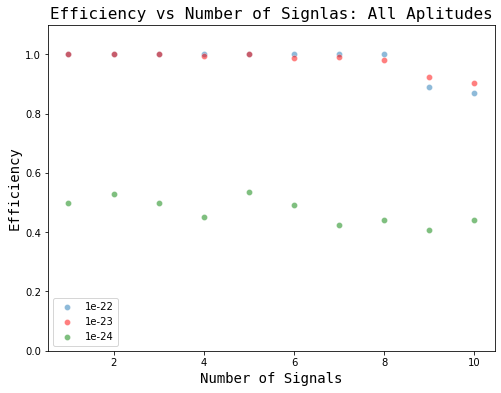

In [137]:
N=np.arange(1,11)
plt.figure(facecolor="w",figsize=[8,6])
sns.scatterplot(N,E1,alpha=.5,label='1e-22')
sns.scatterplot(N,E2,alpha=.5,color='red',label='1e-23')
sns.scatterplot(N,E3,alpha=.5,color='green',label='1e-24')
plt.title('Efficiency vs Number of Signlas: All Aplitudes',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.legend(loc='best')
plt.ylim(0,1.1)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 1.1)

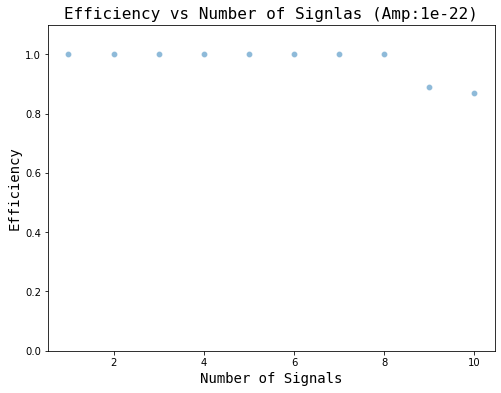

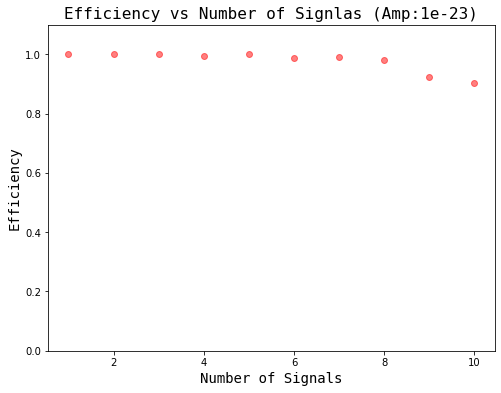

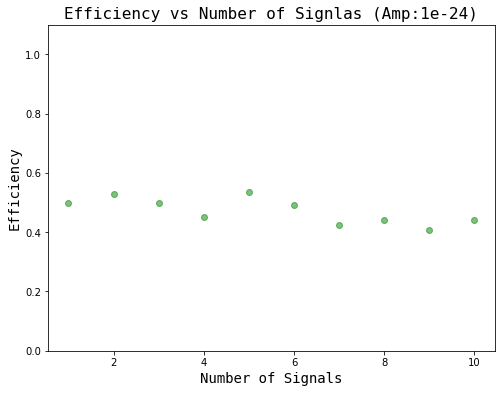

In [138]:
plt.figure(facecolor="w",figsize=[8,6])
sns.scatterplot(N,E1,alpha=.5)
plt.title('Efficiency vs Number of Signlas (Amp:1e-22)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.ylim(0,1.1)


plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E2,alpha=.5,color="red")
plt.title('Efficiency vs Number of Signlas (Amp:1e-23)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.ylim(0,1.1)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E3,alpha=.5,color="green")
plt.title('Efficiency vs Number of Signlas (Amp:1e-24)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.ylim(0,1.1)

# Calcualting the errorbars 

  $\sigma = \sqrt{\frac{p(1-p)}{n}}$

   * n = number of tirals (Sum of N sims)
   * p = probability of success (Efficiency)

In [139]:
#Lets beging by testing this calcuation once
print("Amp -22 Efficiency:",E1)
print("Amp -23 Efficiency:",E2)
print("Amp -24 Efficiency:",E3)

p=E1[0] #the probabiltiy of sucsess of 1 signal w amp -22 (recall this array index stars at 0)
n=sum(df1['N'])

std= np.sqrt((p*(1-p)/n))
std # This should be 0 because the effieincy is 1

Amp -22 Efficiency: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8911111111111111, 0.868]
Amp -23 Efficiency: [1.0, 1.0, 1.0, 0.995, 1.0, 0.9866666666666667, 0.9914285714285714, 0.98, 0.9222222222222223, 0.904]
Amp -24 Efficiency: [0.5, 0.53, 0.5, 0.45, 0.536, 0.49333333333333335, 0.4257142857142857, 0.44, 0.4066666666666667, 0.442]


0.0

In [140]:
#Test with a different val
p=E2[6] #the progability of sucess of 7 signals w amp -23 (recall this array index stars at 0)
n=sum(df5['N'])
std= np.sqrt((p*(1-p)/n))
std # as anticipated the greater the number of signals the larger the standard deviation

0.0033660974800052874

In [141]:
print(E1)
print(E2)
print(E3)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8911111111111111, 0.868]
[1.0, 1.0, 1.0, 0.995, 1.0, 0.9866666666666667, 0.9914285714285714, 0.98, 0.9222222222222223, 0.904]
[0.5, 0.53, 0.5, 0.45, 0.536, 0.49333333333333335, 0.4257142857142857, 0.44, 0.4066666666666667, 0.442]


In [142]:
#lets write a function for this
def Std(df,N,E1,E2,E3):
    """
    This functions calcualted the standard deviation for a simulation at varying amplitudes
    """
    n=sum(df['N'])
    p1=E1[N-1] #The iteration of E1 starts at 0 not 1
    p2=E2[N-1]
    p3=E3[N-1]
    
    sig1=np.sqrt((p1*(1-p1))/n)
    sig2=np.sqrt((p2*(1-p2))/n)
    sig3=np.sqrt((p3*(1-p3))/n)
    
    return sig1,sig2,sig3
    

In [143]:
#Testing function
sig1,sig2,sig3=Std(df5,5,E1,E2,E3)
print(sig1,sig2,sig3) #this makes sence b/c effieiceny is 1 for amps -22 and -23

0.0 0.0 0.018210033864145703


In [144]:
#Calculating all the standard deviations
sig1=[]
sig2=[]
sig3=[]
N=np.arange(1,11)
for i,n in zip(DF,N):
    s1,s2,s3=Std(i,n,E1,E2,E3) 
    sig1.append(s1) #Amp -22
    sig2.append(s2) #Amp -23
    sig3.append(s3) #Amp -24

In [145]:
print(sig1,sig2,sig3) #right len wrong vals

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00847794955842124, 0.00873979404791669] [0.0, 0.0, 0.0, 0.002879525423861834, 0.0, 0.003823255674241164, 0.0028448716070574066, 0.004041451884327382, 0.0072891799600619785, 0.007606313167363015] [0.040824829046386304, 0.02881550508551487, 0.023570226039551584, 0.020310096011589902, 0.018210033864145703, 0.01666518511933571, 0.015259084184372685, 0.014329456840136453, 0.013369087862979502, 0.012822792207627791]


# Adding Error Bars To Graphs 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


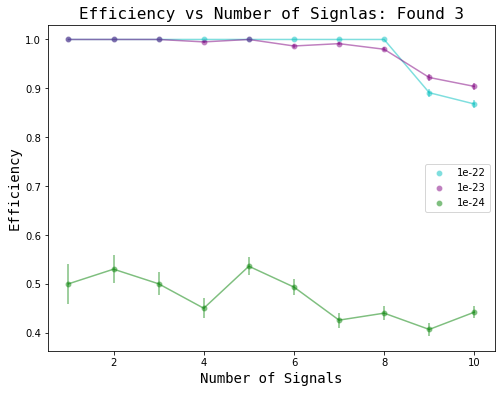

In [146]:
plt.figure(facecolor="w",figsize=[8,6])
sns.scatterplot(N,E1,alpha=.5,color='c',label='1e-22')
sns.scatterplot(N,E2,alpha=.5,color='purple',label='1e-23')
sns.scatterplot(N,E3,alpha=.5,color='green',label='1e-24')
plt.title('Efficiency vs Number of Signlas: Found 3',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.errorbar(N,E1,yerr=sig1,color='c',alpha=0.5)
plt.errorbar(N,E2,yerr=sig2,color='purple',alpha=.5)
plt.errorbar(N,E3,yerr=sig3,color='green',alpha=.5)
plt.legend(loc='center right')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<ErrorbarContainer object of 3 artists>

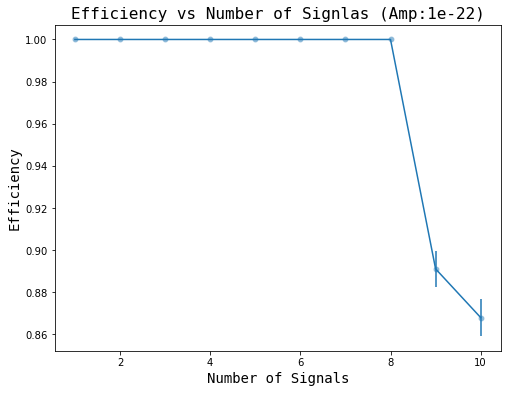

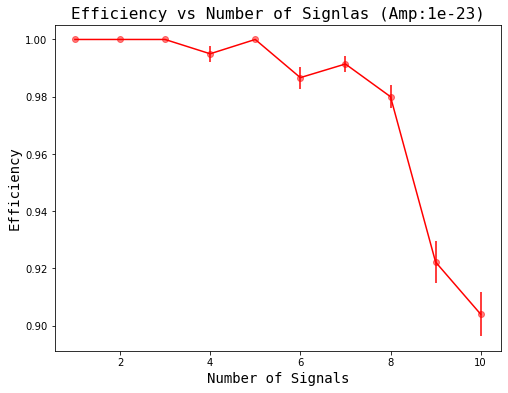

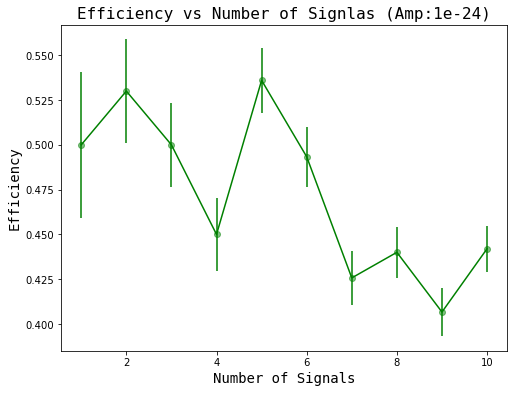

In [147]:
plt.figure(facecolor="w",figsize=[8,6])
sns.scatterplot(N,E1,alpha=.5)
plt.title('Efficiency vs Number of Signlas (Amp:1e-22)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.errorbar(N,E1,yerr=sig1)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E2,alpha=.5,color="red")
plt.title('Efficiency vs Number of Signlas (Amp:1e-23)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.errorbar(N,E2,yerr=sig2,color="red")


plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E3,alpha=.5,color="green")
plt.title('Efficiency vs Number of Signlas (Amp:1e-24)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.errorbar(N,E3,yerr=sig3,color="green")

#  Distance Analysis (Histograms)

Here I'll try to make hisograms based on of the 

## 1 Signal 

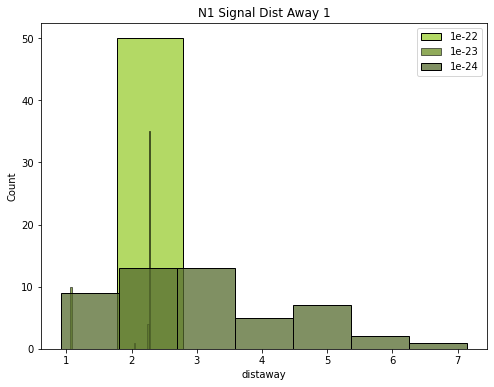

In [21]:
plt.figure(facecolor='w',figsize=(8,6))
h3=df1[df1['h0']==1.000000000000000e-22]['distaway']
h=df1[df1['h0']==1.0000000000000001e-23]['distaway']
h2=df1[df1['h0']==1.0000000000000001e-24]['distaway']
sns.histplot(h3,color='yellowgreen',label='1e-22')
sns.histplot(h,color='olivedrab',label='1e-23')
sns.histplot(h2,color='darkolivegreen',label='1e-24')
plt.title("N1 Signal Dist Away 1")
plt.legend()

## 2 Signals

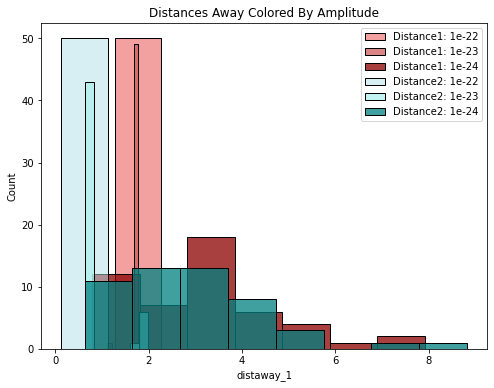

In [22]:
plt.figure(facecolor='w',figsize=(8,6))
h3=df2[df2['h0']==1.000000000000000e-22]['distaway_1']
h=df2[df2['h0']==1.0000000000000001e-23]['distaway_1']
h2=df2[df2['h0']==1.0000000000000001e-24]['distaway_1']
sns.histplot(h3,color='lightcoral',label='Distance1: 1e-22')
sns.histplot(h,color='indianred',label='Distance1: 1e-23')
sns.histplot(h2,color='darkred',label='Distance1: 1e-24')
h3=df2[df2['h0']==1.000000000000000e-22]['distaway_2']
h=df2[df2['h0']==1.0000000000000001e-23]['distaway_2']
h2=df2[df2['h0']==1.0000000000000001e-24]['distaway_2']
sns.histplot(h3,color='powderblue',label='Distance2: 1e-22',alpha=.5)
sns.histplot(h,color='paleturquoise',label='Distance2: 1e-23')
sns.histplot(h2,color='teal',label='Distance2: 1e-24')
plt.title("Distances Away Colored By Amplitude")
plt.legend()

## 3 Signals

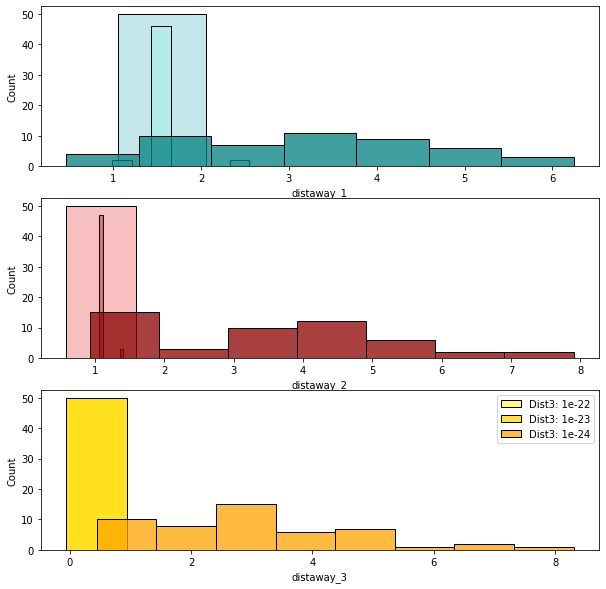

In [23]:
fig, axs = plt.subplots(3,1, figsize=(10,10),facecolor='w')
h3=df3[df3['h0']==1.000000000000000e-22]['distaway_1']
h=df3[df3['h0']==1.0000000000000001e-23]['distaway_1']
h2=df3[df3['h0']==1.0000000000000001e-24]['distaway_1']
sns.histplot(h3,color='powderblue',label='Dist1:1e-22',ax=axs[0])
sns.histplot(h,color='paleturquoise',label='Dist1:1e-23',ax=axs[0])
sns.histplot(h2,color='teal',label='Dist1:1e-24',ax=axs[0])

h3=df3[df3['h0']==1.000000000000000e-22]['distaway_2']
h=df3[df3['h0']==1.0000000000000001e-23]['distaway_2']
h2=df3[df3['h0']==1.0000000000000001e-24]['distaway_2']
sns.histplot(h3,color='lightcoral', label='Dist2: 1e-22',alpha=.5,ax=axs[1])
sns.histplot(h,color='indianred', label='Dist2: 1e-23',ax=axs[1])
sns.histplot(h2,color='darkred' ,label='Dist2: 1e-24',ax=axs[1])

h3=df3[df3['h0']==1.000000000000000e-22]['distaway_3']
h=df3[df3['h0']==1.0000000000000001e-23]['distaway_3']
h2=df3[df3['h0']==1.0000000000000001e-24]['distaway_3']
sns.histplot(h3,color='yellow',label='Dist3: 1e-22',alpha=.5,ax=axs[2])
sns.histplot(h,color='gold',label='Dist3: 1e-23',ax=axs[2])
sns.histplot(h2,color='orange',label='Dist3: 1e-24',ax=axs[2])
plt.legend()

## 4 Signals

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


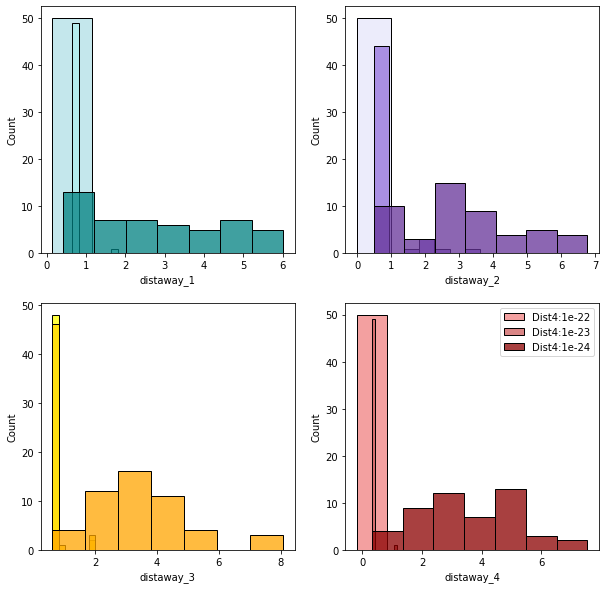

In [24]:
#shifting to ann alternative (subsplots)

fig, axs = plt.subplots(2, 2, figsize=(10, 10),facecolor='w')
h3=df4[df4['h0']==1.000000000000000e-22]['distaway_1']
h=df4[df4['h0']==1.0000000000000001e-23]['distaway_1']
h2=df4[df4['h0']==1.0000000000000001e-24]['distaway_1']
sns.histplot(h3,color='powderblue',label='Dist1:1e-22', ax=axs[0, 0])
sns.histplot(h,color='paleturquoise',label='Dist1:1e-23', ax=axs[0, 0])
sns.histplot(h2,color='teal',label='Dist1:1e-24', ax=axs[0, 0])
plt.legend()

h3=df4[df4['h0']==1.000000000000000e-22]['distaway_2']
h=df4[df4['h0']==1.0000000000000001e-23]['distaway_2']
h2=df4[df4['h0']==1.0000000000000001e-24]['distaway_2']
sns.histplot(h3,color='lavender',label='Dist2:1e-22', ax=axs[0, 1])
sns.histplot(h,color='mediumpurple',label='Dist2:1e-23', ax=axs[0, 1])
sns.histplot(h2,color='rebeccapurple',label='Dist2:1e-24', ax=axs[0, 1])
plt.legend()

h3=df4[df4['h0']==1.000000000000000e-22]['distaway_3']
h=df4[df4['h0']==1.0000000000000001e-23]['distaway_3']
h2=df4[df4['h0']==1.0000000000000001e-24]['distaway_3']
sns.histplot(h3,color='yellow',label='Dist3:1e-22', ax=axs[1, 0])
sns.histplot(h,color='gold',label='Dist3:1e-23', ax=axs[1, 0])
sns.histplot(h2,color='orange',label='Dist3:1e-24', ax=axs[1, 0])

h3=df4[df4['h0']==1.000000000000000e-22]['distaway_4']
h=df4[df4['h0']==1.0000000000000001e-23]['distaway_4']
h2=df4[df4['h0']==1.0000000000000001e-24]['distaway_4']
sns.histplot(h3,color='lightcoral',label='Dist4:1e-22', ax=axs[1, 1])
sns.histplot(h,color='indianred',label='Dist4:1e-23', ax=axs[1, 1])
sns.histplot(h2,color='darkred',label='Dist4:1e-24', ax=axs[1, 1])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:xlabel='distaway_8', ylabel='Count'>

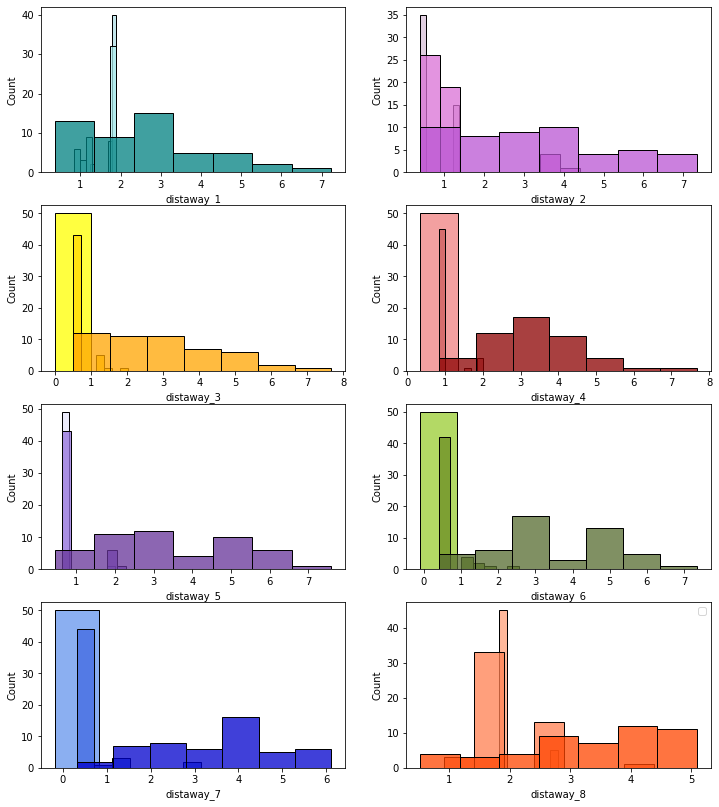

In [25]:
fig, axs = plt.subplots(4, 2, figsize=(12, 14),facecolor='w')

h3=df8[df8['h0']==1.000000000000000e-22]['distaway_1']
h=df8[df8['h0']==1.0000000000000001e-23]['distaway_1']
h2=df8[df8['h0']==1.0000000000000001e-24]['distaway_1']
sns.histplot(h3,color='powderblue',label='Dist1:1e-22', ax=axs[0, 0])
sns.histplot(h,color='paleturquoise',label='Dist1:1e-23', ax=axs[0, 0])
sns.histplot(h2,color='teal',label='Dist1:1e-24', ax=axs[0, 0])
plt.legend()

h3=df8[df8['h0']==1.000000000000000e-22]['distaway_2']
h=df8[df8['h0']==1.0000000000000001e-23]['distaway_2']
h2=df8[df8['h0']==1.0000000000000001e-24]['distaway_2']
sns.histplot(h3,color='thistle',label='Dist2:1e-22', ax=axs[0, 1])
sns.histplot(h,color='orchid',label='Dist2:1e-23', ax=axs[0, 1])
sns.histplot(h2,color='mediumorchid',label='Dist2:1e-24', ax=axs[0, 1])
plt.legend()

h3=df8[df8['h0']==1.000000000000000e-22]['distaway_3']
h=df8[df8['h0']==1.0000000000000001e-23]['distaway_3']
h2=df8[df8['h0']==1.0000000000000001e-24]['distaway_3']
sns.histplot(h3,color='yellow',label='Dist3:1e-22', ax=axs[1, 0])
sns.histplot(h,color='gold',label='Dist3:1e-23', ax=axs[1, 0])
sns.histplot(h2,color='orange',label='Dist3:1e-24', ax=axs[1, 0])

h3=df8[df8['h0']==1.000000000000000e-22]['distaway_4']
h=df8[df8['h0']==1.0000000000000001e-23]['distaway_4']
h2=df8[df8['h0']==1.0000000000000001e-24]['distaway_4']
sns.histplot(h3,color='lightcoral',label='Dist4:1e-22', ax=axs[1, 1])
sns.histplot(h,color='indianred',label='Dist4:1e-23', ax=axs[1, 1])
sns.histplot(h2,color='darkred',label='Dist4:1e-24', ax=axs[1, 1])

h3=df8[df8['h0']==1.000000000000000e-22]['distaway_5']
h=df8[df8['h0']==1.0000000000000001e-23]['distaway_5']
h2=df8[df8['h0']==1.0000000000000001e-24]['distaway_5']
sns.histplot(h3,color='lavender',label='Dist4:1e-22', ax=axs[2, 0])
sns.histplot(h,color='mediumpurple',label='Dist4:1e-23', ax=axs[2, 0])
sns.histplot(h2,color='rebeccapurple',label='Dist4:1e-24', ax=axs[2,0])

h3=df8[df8['h0']==1.000000000000000e-22]['distaway_6']
h=df8[df8['h0']==1.0000000000000001e-23]['distaway_6']
h2=df8[df8['h0']==1.0000000000000001e-24]['distaway_6']
sns.histplot(h3,color='yellowgreen',label='Dist4:1e-22', ax=axs[2, 1])
sns.histplot(h,color='olivedrab',label='Dist4:1e-23', ax=axs[2, 1])
sns.histplot(h2,color='darkolivegreen',label='Dist4:1e-24', ax=axs[2, 1])

h3=df8[df8['h0']==1.000000000000000e-22]['distaway_7']
h=df8[df8['h0']==1.0000000000000001e-23]['distaway_7']
h2=df8[df8['h0']==1.0000000000000001e-24]['distaway_7']
sns.histplot(h3,color='cornflowerblue',label='Dist4:1e-22', ax=axs[3, 0])
sns.histplot(h,color='royalblue',label='Dist4:1e-23', ax=axs[3, 0])
sns.histplot(h2,color='mediumblue',label='Dist4:1e-24', ax=axs[3, 0])

h3=df8[df8['h0']==1.000000000000000e-22]['distaway_8']
h=df8[df8['h0']==1.0000000000000001e-23]['distaway_8']
h2=df8[df8['h0']==1.0000000000000001e-24]['distaway_8']
sns.histplot(h3,color='lightsalmon',label='Dist4:1e-22', ax=axs[3, 1])
sns.histplot(h,color='coral',label='Dist4:1e-23', ax=axs[3, 1])
sns.histplot(h2,color='orangered',label='Dist4:1e-24', ax=axs[3, 1])

## 9 Signals

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:xlabel='distaway_9', ylabel='Count'>

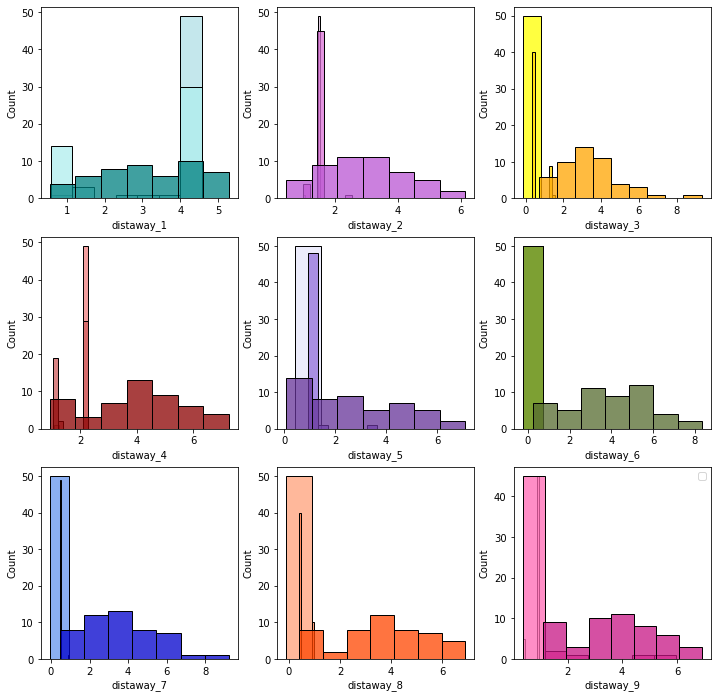

In [26]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12),facecolor='w')
h3=df9[df9['h0']==1.000000000000000e-22]['distaway_1']
h=df9[df9['h0']==1.0000000000000001e-23]['distaway_1']
h2=df9[df9['h0']==1.0000000000000001e-24]['distaway_1']
sns.histplot(h3,color='powderblue',label='Dist1:1e-22', ax=axs[0, 0])
sns.histplot(h,color='paleturquoise',label='Dist1:1e-23', ax=axs[0, 0])
sns.histplot(h2,color='teal',label='Dist1:1e-24', ax=axs[0, 0])
plt.legend()

h3=df9[df9['h0']==1.000000000000000e-22]['distaway_2']
h=df9[df9['h0']==1.0000000000000001e-23]['distaway_2']
h2=df9[df9['h0']==1.0000000000000001e-24]['distaway_2']
sns.histplot(h3,color='thistle',label='Dist2:1e-22', ax=axs[0, 1])
sns.histplot(h,color='orchid',label='Dist2:1e-23', ax=axs[0, 1])
sns.histplot(h2,color='mediumorchid',label='Dist2:1e-24', ax=axs[0, 1])
plt.legend()

h3=df9[df9['h0']==1.000000000000000e-22]['distaway_3']
h=df9[df9['h0']==1.0000000000000001e-23]['distaway_3']
h2=df9[df9['h0']==1.0000000000000001e-24]['distaway_3']
sns.histplot(h3,color='yellow',label='Dist3:1e-22', ax=axs[0, 2])
sns.histplot(h,color='gold',label='Dist3:1e-23', ax=axs[0, 2])
sns.histplot(h2,color='orange',label='Dist3:1e-24', ax=axs[0, 2])

h3=df9[df9['h0']==1.000000000000000e-22]['distaway_4']
h=df9[df9['h0']==1.0000000000000001e-23]['distaway_4']
h2=df9[df9['h0']==1.0000000000000001e-24]['distaway_4']
sns.histplot(h3,color='lightcoral',label='Dist4:1e-22', ax=axs[1, 0])
sns.histplot(h,color='indianred',label='Dist4:1e-23', ax=axs[1, 0])
sns.histplot(h2,color='darkred',label='Dist4:1e-24', ax=axs[1, 0])

h3=df9[df9['h0']==1.000000000000000e-22]['distaway_5']
h=df9[df9['h0']==1.0000000000000001e-23]['distaway_5']
h2=df9[df9['h0']==1.0000000000000001e-24]['distaway_5']
sns.histplot(h3,color='lavender',label='Dist4:1e-22', ax=axs[1, 1])
sns.histplot(h,color='mediumpurple',label='Dist4:1e-23', ax=axs[1, 1])
sns.histplot(h2,color='rebeccapurple',label='Dist4:1e-24', ax=axs[1, 1])

h3=df9[df9['h0']==1.000000000000000e-22]['distaway_6']
h=df9[df9['h0']==1.0000000000000001e-23]['distaway_6']
h2=df9[df9['h0']==1.0000000000000001e-24]['distaway_6']
sns.histplot(h3,color='yellowgreen',label='Dist4:1e-22', ax=axs[1, 2])
sns.histplot(h,color='olivedrab',label='Dist4:1e-23', ax=axs[1, 2])
sns.histplot(h2,color='darkolivegreen',label='Dist4:1e-24', ax=axs[1, 2])

h3=df9[df9['h0']==1.000000000000000e-22]['distaway_7']
h=df9[df9['h0']==1.0000000000000001e-23]['distaway_7']
h2=df9[df9['h0']==1.0000000000000001e-24]['distaway_7']
sns.histplot(h3,color='cornflowerblue',label='Dist4:1e-22', ax=axs[2, 0])
sns.histplot(h,color='royalblue',label='Dist4:1e-23', ax=axs[2, 0])
sns.histplot(h2,color='mediumblue',label='Dist4:1e-24', ax=axs[2, 0])

h3=df9[df9['h0']==1.000000000000000e-22]['distaway_8']
h=df9[df9['h0']==1.0000000000000001e-23]['distaway_8']
h2=df9[df9['h0']==1.0000000000000001e-24]['distaway_8']
sns.histplot(h3,color='lightsalmon',label='Dist4:1e-22', ax=axs[2, 1])
sns.histplot(h,color='coral',label='Dist4:1e-23', ax=axs[2, 1])
sns.histplot(h2,color='orangered',label='Dist4:1e-24', ax=axs[2, 1])

h3=df9[df9['h0']==1.000000000000000e-22]['distaway_9']
h=df9[df9['h0']==1.0000000000000001e-23]['distaway_9']
h2=df9[df9['h0']==1.0000000000000001e-24]['distaway_9']
sns.histplot(h3,color='pink',label='Dist4:1e-22', ax=axs[2, 2])
sns.histplot(h,color='hotpink',label='Dist4:1e-23', ax=axs[2, 2])
sns.histplot(h2,color='mediumvioletred',label='Dist4:1e-24', ax=axs[2, 2])

# Re Dist Historgrams

### 1 Sig

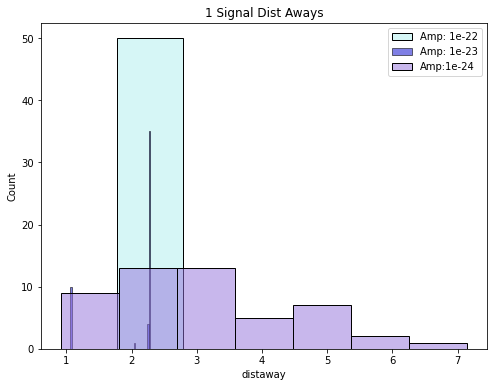

In [27]:
dist_22=df1[df1['h0']==1.0000000000000000e-22]['distaway']
dist_23=df1[df1['h0']==1.0000000000000001e-23]['distaway']
dist_24=df1[df1['h0']==1.0000000000000001e-24]['distaway']

plt.figure(figsize=(8,6),facecolor='w')
sns.histplot(dist_22,alpha=.5,label='Amp: 1e-22',color='paleturquoise')
sns.histplot(dist_23,alpha=.5,label='Amp: 1e-23',color='mediumblue')
sns.histplot(dist_24,alpha=.5,label='Amp:1e-24',color='mediumpurple')
plt.title('1 Signal Dist Aways')
plt.legend()

### 2 Sig

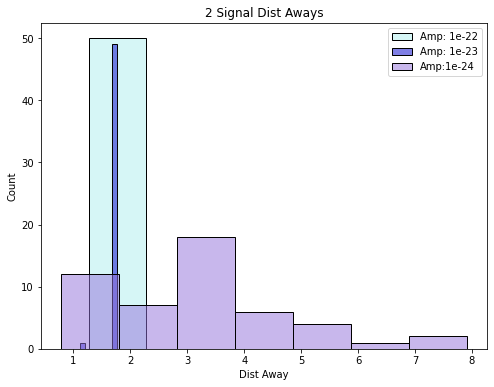

In [28]:
dist_22=df2[df2['h0']==1.0000000000000000e-22]['distaway_1']
dist2_22=df2[df2['h0']==1.0000000000000000e-22]['distaway_2']
dist_23=df2[df2['h0']==1.0000000000000001e-23]['distaway_1']
dist2_23=df2[df2['h0']==1.0000000000000001e-23]['distaway_2']
dist_24=df2[df2['h0']==1.0000000000000001e-24]['distaway_1']
dist2_24=df2[df2['h0']==1.0000000000000001e-24]['distaway_2']

dist22=np.array(dist_22,dist2_22)
dist23=np.array(dist_23,dist2_23)
dist24=np.array(dist_24,dist2_24)

plt.figure(figsize=(8,6),facecolor='w')
sns.histplot(dist22,alpha=.5,label='Amp: 1e-22',color='paleturquoise')
sns.histplot(dist23,alpha=.5,label='Amp: 1e-23',color='mediumblue')
sns.histplot(dist24,alpha=.5,label='Amp:1e-24',color='mediumpurple')
plt.title('2 Signal Dist Aways')
plt.xlabel("Dist Away")
plt.legend()

### 3 Sig

In [29]:
dist_22=[(df3[df3['h0']==1.0000000000000000e-22]['distaway_1'])]
dist2_22=[(df3[df3['h0']==1.0000000000000000e-22]['distaway_2'])]
dist3_22=[(df3[df3['h0']==1.0000000000000000e-22]['distaway_3'])]

dist_23=[df3[df3['h0']==1.0000000000000001e-23]['distaway_1']]
dist2_23=[df3[df3['h0']==1.0000000000000001e-23]['distaway_2']]
dist3_23=[df3[df3['h0']==1.0000000000000001e-23]['distaway_3']]

dist_24=[df3[df3['h0']==1.0000000000000001e-24]['distaway_1']]
dist2_24=[(df3[df3['h0']==1.0000000000000001e-24]['distaway_2'])]
dist3_24=[df3[df3['h0']==1.0000000000000001e-24]['distaway_3']]

dist_22=np.array([dist_22,dist2_22,dist3_22])
dist_22=dist_22.flatten()

dist_23=np.array([dist_23,dist2_23,dist3_22])
dist_23=dist_23.flatten()

dist_24=np.array([dist_24,dist2_24,dist3_24])
dist_24=dist_24.flatten()


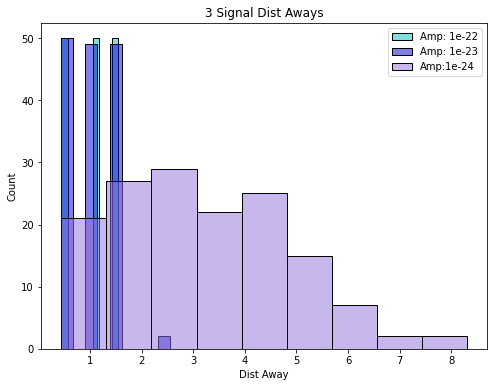

In [30]:
plt.figure(figsize=(8,6),facecolor='w')
sns.histplot(dist_22,alpha=.5,label='Amp: 1e-22',color='c')
sns.histplot(dist_23,alpha=.5,label='Amp: 1e-23',color='mediumblue')
sns.histplot(dist_24,alpha=.5,label='Amp:1e-24',color='mediumpurple')
plt.title('3 Signal Dist Aways')
plt.xlabel("Dist Away")
plt.legend()

### 4 sig

In [31]:
dist_22=[(df4[df4['h0']==1.0000000000000000e-22]['distaway_1'])]
dist2_22=[(df4[df4['h0']==1.0000000000000000e-22]['distaway_2'])]
dist3_22=[(df4[df4['h0']==1.0000000000000000e-22]['distaway_3'])]
dist4_22=[(df4[df4['h0']==1.0000000000000000e-22]['distaway_4'])]

dist_23=[df4[df4['h0']==1.0000000000000001e-23]['distaway_1']]
dist2_23=[df4[df4['h0']==1.0000000000000001e-23]['distaway_2']]
dist3_23=[df4[df4['h0']==1.0000000000000001e-23]['distaway_3']]
dist4_23=[df4[df4['h0']==1.0000000000000001e-23]['distaway_4']]


dist_24=[df4[df4['h0']==1.0000000000000001e-24]['distaway_1']]
dist2_24=[(df4[df4['h0']==1.0000000000000001e-24]['distaway_2'])]
dist3_24=[df4[df4['h0']==1.0000000000000001e-24]['distaway_3']]
dist4_24=[df4[df4['h0']==1.0000000000000001e-24]['distaway_4']]


dist_22=np.array([dist_22,dist2_22,dist3_22,dist4_22])
dist_22=dist_22.flatten()

dist_23=np.array([dist_23,dist2_23,dist3_22,dist4_23])
dist_23=dist_23.flatten()

dist_24=np.array([dist_24,dist2_24,dist3_24,dist4_24])
dist_24=dist_24.flatten()

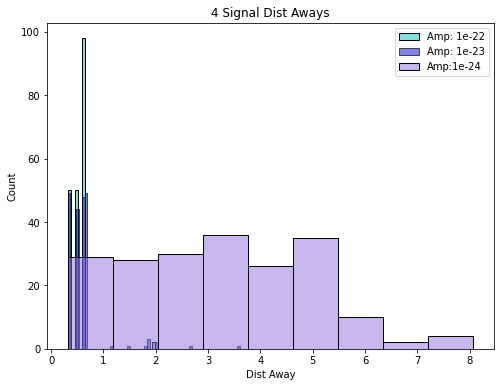

In [32]:
plt.figure(figsize=(8,6),facecolor='w')
sns.histplot(dist_22,alpha=.5,label='Amp: 1e-22',color='c')
sns.histplot(dist_23,alpha=.5,label='Amp: 1e-23',color='mediumblue')
sns.histplot(dist_24,alpha=.5,label='Amp:1e-24',color='mediumpurple')
plt.title('4 Signal Dist Aways')
plt.xlabel("Dist Away")
plt.legend()

### 5 Sig

In [33]:
dist_22=[(df5[df5['h0']==1.0000000000000000e-22]['distaway_1'])]
dist2_22=[(df5[df5['h0']==1.0000000000000000e-22]['distaway_2'])]
dist3_22=[(df5[df5['h0']==1.0000000000000000e-22]['distaway_3'])]
dist4_22=[(df5[df5['h0']==1.0000000000000000e-22]['distaway_4'])]
dist5_22=[(df5[df5['h0']==1.0000000000000000e-22]['distaway_5'])]

dist_23=[df5[df5['h0']==1.0000000000000001e-23]['distaway_1']]
dist2_23=[df5[df5['h0']==1.0000000000000001e-23]['distaway_2']]
dist3_23=[df5[df5['h0']==1.0000000000000001e-23]['distaway_3']]
dist4_23=[df5[df5['h0']==1.0000000000000001e-23]['distaway_4']]
dist5_23=[df5[df5['h0']==1.0000000000000001e-23]['distaway_5']]

dist_24=[df5[df5['h0']==1.0000000000000001e-24]['distaway_1']]
dist2_24=[df5[df5['h0']==1.0000000000000001e-24]['distaway_2']]
dist3_24=[df5[df5['h0']==1.0000000000000001e-24]['distaway_3']]
dist4_24=[df5[df5['h0']==1.0000000000000001e-24]['distaway_4']]
dist5_24=[df5[df5['h0']==1.0000000000000001e-24]['distaway_5']]


dist_22=np.array([dist_22,dist2_22,dist3_22,dist4_22,dist5_22])
dist_22=dist_22.flatten()

dist_23=np.array([dist_23,dist2_23,dist3_22,dist4_23,dist5_23])
dist_23=dist_23.flatten()

dist_24=np.array([dist_24,dist2_24,dist3_24,dist4_24,dist5_24])
dist_24=dist_24.flatten()

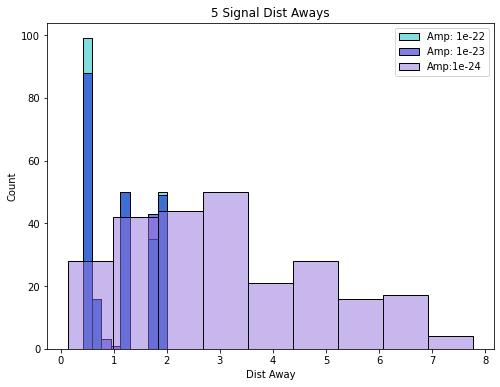

In [34]:
plt.figure(figsize=(8,6),facecolor='w')
sns.histplot(dist_22,alpha=.5,label='Amp: 1e-22',color='c')
sns.histplot(dist_23,alpha=.5,label='Amp: 1e-23',color='mediumblue')
sns.histplot(dist_24,alpha=.5,label='Amp:1e-24',color='mediumpurple')
plt.title('5 Signal Dist Aways')
plt.xlabel("Dist Away")
plt.legend()

### 6 sig

In [35]:
dist_22=[(df6[df6['h0']==1.0000000000000000e-22]['distaway_1'])]
dist2_22=[(df6[df6['h0']==1.0000000000000000e-22]['distaway_2'])]
dist3_22=[(df6[df6['h0']==1.0000000000000000e-22]['distaway_3'])]
dist4_22=[(df6[df6['h0']==1.0000000000000000e-22]['distaway_4'])]
dist5_22=[(df6[df6['h0']==1.0000000000000000e-22]['distaway_5'])]
dist6_22=[(df6[df6['h0']==1.0000000000000000e-22]['distaway_6'])]

dist_23=[df6[df6['h0']==1.0000000000000001e-23]['distaway_1']]
dist2_23=[df6[df6['h0']==1.0000000000000001e-23]['distaway_2']]
dist3_23=[df6[df6['h0']==1.0000000000000001e-23]['distaway_3']]
dist4_23=[df6[df6['h0']==1.0000000000000001e-23]['distaway_4']]
dist5_23=[df6[df6['h0']==1.0000000000000001e-23]['distaway_5']]
dist6_23=[df6[df6['h0']==1.0000000000000001e-23]['distaway_6']]

dist_24=[df6[df6['h0']==1.0000000000000001e-24]['distaway_1']]
dist2_24=[df6[df6['h0']==1.0000000000000001e-24]['distaway_2']]
dist3_24=[df6[df6['h0']==1.0000000000000001e-24]['distaway_3']]
dist4_24=[df6[df6['h0']==1.0000000000000001e-24]['distaway_4']]
dist5_24=[df6[df6['h0']==1.0000000000000001e-24]['distaway_5']]
dist6_24=[df6[df6['h0']==1.0000000000000001e-24]['distaway_6']]


dist_22=np.array([dist_22,dist2_22,dist3_22,dist4_22,dist5_22,dist6_22])
dist_22=dist_22.flatten()

dist_23=np.array([dist_23,dist2_23,dist3_22,dist4_23,dist5_23,dist6_23])
dist_23=dist_23.flatten()

dist_24=np.array([dist_24,dist2_24,dist3_24,dist4_24,dist5_24,dist6_24])
dist_24=dist_24.flatten()

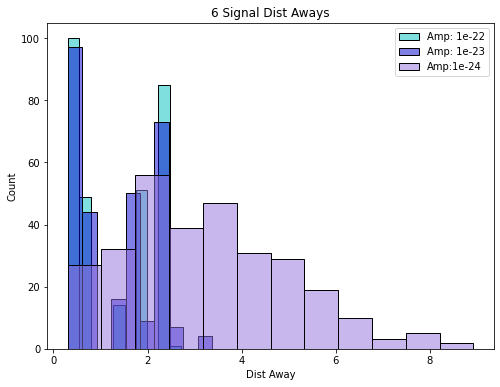

In [36]:
plt.figure(figsize=(8,6),facecolor='w')
sns.histplot(dist_22,alpha=.5,label='Amp: 1e-22',color='c')
sns.histplot(dist_23,alpha=.5,label='Amp: 1e-23',color='mediumblue')
sns.histplot(dist_24,alpha=.5,label='Amp:1e-24',color='mediumpurple')
plt.title('6 Signal Dist Aways')
plt.xlabel("Dist Away")
plt.legend()

### 7 Sig

In [37]:
dist_22=[(df7[df7['h0']==1.0000000000000000e-22]['distaway_1'])]
dist2_22=[(df7[df7['h0']==1.0000000000000000e-22]['distaway_2'])]
dist3_22=[(df7[df7['h0']==1.0000000000000000e-22]['distaway_3'])]
dist4_22=[(df7[df7['h0']==1.0000000000000000e-22]['distaway_4'])]
dist5_22=[(df7[df7['h0']==1.0000000000000000e-22]['distaway_5'])]
dist6_22=[(df7[df7['h0']==1.0000000000000000e-22]['distaway_6'])]
dist7_22=[(df7[df7['h0']==1.0000000000000000e-22]['distaway_7'])]

dist_23=[df7[df7['h0']==1.0000000000000001e-23]['distaway_1']]
dist2_23=[df7[df7['h0']==1.0000000000000001e-23]['distaway_2']]
dist3_23=[df7[df7['h0']==1.0000000000000001e-23]['distaway_3']]
dist4_23=[df7[df7['h0']==1.0000000000000001e-23]['distaway_4']]
dist5_23=[df7[df7['h0']==1.0000000000000001e-23]['distaway_5']]
dist6_23=[df7[df7['h0']==1.0000000000000001e-23]['distaway_6']]
dist7_23=[df7[df7['h0']==1.0000000000000001e-23]['distaway_7']]

dist_24=[df7[df7['h0']==1.0000000000000001e-24]['distaway_1']]
dist2_24=[df7[df7['h0']==1.0000000000000001e-24]['distaway_2']]
dist3_24=[df7[df7['h0']==1.0000000000000001e-24]['distaway_3']]
dist4_24=[df7[df7['h0']==1.0000000000000001e-24]['distaway_4']]
dist5_24=[df7[df7['h0']==1.0000000000000001e-24]['distaway_5']]
dist6_24=[df7[df7['h0']==1.0000000000000001e-24]['distaway_6']]
dist7_24=[df7[df7['h0']==1.0000000000000001e-24]['distaway_7']]

dist_22=np.array([dist_22,dist2_22,dist3_22,dist4_22,dist5_22,dist6_22,dist7_22])
dist_22=dist_22.flatten()

dist_23=np.array([dist_23,dist2_23,dist3_22,dist4_23,dist5_23,dist6_23,dist7_23])
dist_23=dist_23.flatten()

dist_24=np.array([dist_24,dist2_24,dist3_24,dist4_24,dist5_24,dist6_24,dist7_24])
dist_24=dist_24.flatten()

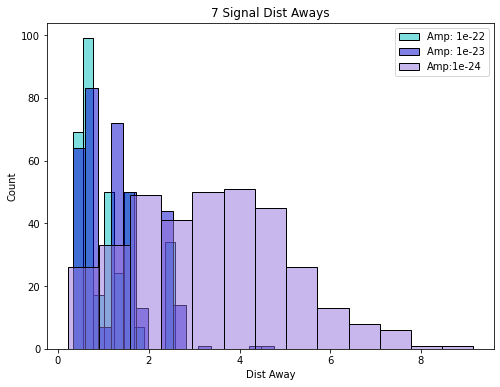

In [38]:
plt.figure(figsize=(8,6),facecolor='w')
sns.histplot(dist_22,alpha=.5,label='Amp: 1e-22',color='c')
sns.histplot(dist_23,alpha=.5,label='Amp: 1e-23',color='mediumblue')
sns.histplot(dist_24,alpha=.5,label='Amp:1e-24',color='mediumpurple')
plt.title('7 Signal Dist Aways')
plt.xlabel("Dist Away")
plt.legend()

### 8 Sig

In [39]:
dist_22=[(df8[df8['h0']==1.0000000000000000e-22]['distaway_1'])]
dist2_22=[(df8[df8['h0']==1.0000000000000000e-22]['distaway_2'])]
dist3_22=[(df8[df8['h0']==1.0000000000000000e-22]['distaway_3'])]
dist4_22=[(df8[df8['h0']==1.0000000000000000e-22]['distaway_4'])]
dist5_22=[(df8[df8['h0']==1.0000000000000000e-22]['distaway_5'])]
dist6_22=[(df8[df8['h0']==1.0000000000000000e-22]['distaway_6'])]
dist7_22=[(df8[df8['h0']==1.0000000000000000e-22]['distaway_7'])]
dist8_22=[(df8[df8['h0']==1.0000000000000000e-22]['distaway_8'])]

dist_23=[df8[df8['h0']==1.0000000000000001e-23]['distaway_1']]
dist2_23=[df8[df8['h0']==1.0000000000000001e-23]['distaway_2']]
dist3_23=[df8[df8['h0']==1.0000000000000001e-23]['distaway_3']]
dist4_23=[df8[df8['h0']==1.0000000000000001e-23]['distaway_4']]
dist5_23=[df8[df8['h0']==1.0000000000000001e-23]['distaway_5']]
dist6_23=[df8[df8['h0']==1.0000000000000001e-23]['distaway_6']]
dist7_23=[df8[df8['h0']==1.0000000000000001e-23]['distaway_7']]
dist8_23=[df8[df8['h0']==1.0000000000000001e-23]['distaway_8']]

dist_24=[df8[df8['h0']==1.0000000000000001e-24]['distaway_1']]
dist2_24=[df8[df8['h0']==1.0000000000000001e-24]['distaway_2']]
dist3_24=[df8[df8['h0']==1.0000000000000001e-24]['distaway_3']]
dist4_24=[df8[df8['h0']==1.0000000000000001e-24]['distaway_4']]
dist5_24=[df8[df8['h0']==1.0000000000000001e-24]['distaway_5']]
dist6_24=[df8[df8['h0']==1.0000000000000001e-24]['distaway_6']]
dist7_24=[df8[df8['h0']==1.0000000000000001e-24]['distaway_7']]
dist8_24=[df8[df8['h0']==1.0000000000000001e-24]['distaway_8']]

dist_22=np.array([dist_22,dist2_22,dist3_22,dist4_22,dist5_22,dist6_22,dist7_22,dist8_22])
dist_22=dist_22.flatten()

dist_23=np.array([dist_23,dist2_23,dist3_22,dist4_23,dist5_23,dist6_23,dist7_23,dist8_23])
dist_23=dist_23.flatten()

dist_24=np.array([dist_24,dist2_24,dist3_24,dist4_24,dist5_24,dist6_24,dist7_24,dist8_24])
dist_24=dist_24.flatten()

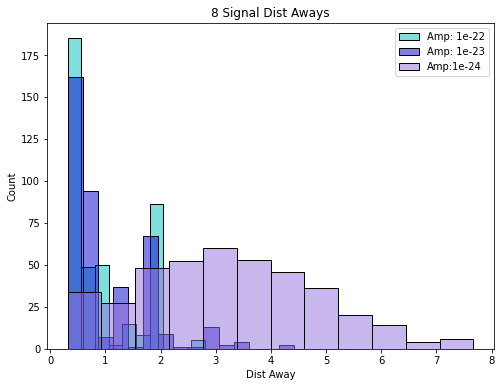

In [40]:
plt.figure(figsize=(8,6),facecolor='w')
sns.histplot(dist_22,alpha=.5,label='Amp: 1e-22',color='c')
sns.histplot(dist_23,alpha=.5,label='Amp: 1e-23',color='mediumblue')
sns.histplot(dist_24,alpha=.5,label='Amp:1e-24',color='mediumpurple')
plt.title('8 Signal Dist Aways')
plt.xlabel("Dist Away")
plt.legend()

### 9 Sig

In [41]:
dist_22=[(df9[df9['h0']==1.0000000000000000e-22]['distaway_1'])]
dist2_22=[(df9[df9['h0']==1.0000000000000000e-22]['distaway_2'])]
dist3_22=[(df9[df9['h0']==1.0000000000000000e-22]['distaway_3'])]
dist4_22=[(df9[df9['h0']==1.0000000000000000e-22]['distaway_4'])]
dist5_22=[(df9[df9['h0']==1.0000000000000000e-22]['distaway_5'])]
dist6_22=[(df9[df9['h0']==1.0000000000000000e-22]['distaway_6'])]
dist7_22=[(df9[df9['h0']==1.0000000000000000e-22]['distaway_7'])]
dist8_22=[(df9[df9['h0']==1.0000000000000000e-22]['distaway_8'])]
dist9_22=[(df9[df9['h0']==1.0000000000000000e-22]['distaway_9'])]

dist_23=[df9[df9['h0']==1.0000000000000001e-23]['distaway_1']]
dist2_23=[df9[df9['h0']==1.0000000000000001e-23]['distaway_2']]
dist3_23=[df9[df9['h0']==1.0000000000000001e-23]['distaway_3']]
dist4_23=[df9[df9['h0']==1.0000000000000001e-23]['distaway_4']]
dist5_23=[df9[df9['h0']==1.0000000000000001e-23]['distaway_5']]
dist6_23=[df9[df9['h0']==1.0000000000000001e-23]['distaway_6']]
dist7_23=[df9[df9['h0']==1.0000000000000001e-23]['distaway_7']]
dist8_23=[df9[df9['h0']==1.0000000000000001e-23]['distaway_8']]
dist9_23=[df9[df9['h0']==1.0000000000000001e-23]['distaway_9']]

dist_24=[df9[df9['h0']==1.0000000000000001e-24]['distaway_1']]
dist2_24=[df9[df9['h0']==1.0000000000000001e-24]['distaway_2']]
dist3_24=[df9[df9['h0']==1.0000000000000001e-24]['distaway_3']]
dist4_24=[df9[df9['h0']==1.0000000000000001e-24]['distaway_4']]
dist5_24=[df9[df9['h0']==1.0000000000000001e-24]['distaway_5']]
dist6_24=[df9[df9['h0']==1.0000000000000001e-24]['distaway_6']]
dist7_24=[df9[df9['h0']==1.0000000000000001e-24]['distaway_7']]
dist8_24=[df9[df9['h0']==1.0000000000000001e-24]['distaway_8']]
dist9_24=[df9[df9['h0']==1.0000000000000001e-24]['distaway_9']]

dist_22=np.array([dist_22,dist2_22,dist3_22,dist4_22,dist5_22,dist6_22,dist7_22,dist8_22,dist9_22])
dist_22=dist_22.flatten()

dist_23=np.array([dist_23,dist2_23,dist3_22,dist4_23,dist5_23,dist6_23,dist7_23,dist8_23,dist9_23])
dist_23=dist_23.flatten()

dist_24=np.array([dist_24,dist2_24,dist3_24,dist4_24,dist5_24,dist6_24,dist7_24,dist8_24,dist9_24])
dist_24=dist_24.flatten()

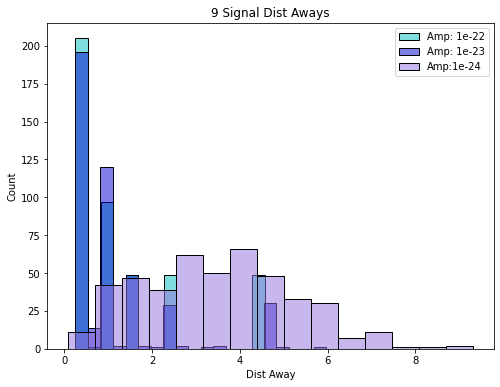

In [42]:
plt.figure(figsize=(8,6),facecolor='w')
sns.histplot(dist_22,alpha=.5,label='Amp: 1e-22',color='c')
sns.histplot(dist_23,alpha=.5,label='Amp: 1e-23',color='mediumblue')
sns.histplot(dist_24,alpha=.5,label='Amp:1e-24',color='mediumpurple')
plt.title('9 Signal Dist Aways')
plt.xlabel("Dist Away")
plt.legend()

### 10 Sig

In [43]:
dist_22=[(df10[df10['h0']==1.0000000000000000e-22]['distaway_1'])]
dist2_22=[(df10[df10['h0']==1.0000000000000000e-22]['distaway_2'])]
dist3_22=[(df10[df10['h0']==1.0000000000000000e-22]['distaway_3'])]
dist4_22=[(df10[df10['h0']==1.0000000000000000e-22]['distaway_4'])]
dist5_22=[(df10[df10['h0']==1.0000000000000000e-22]['distaway_5'])]
dist6_22=[(df10[df10['h0']==1.0000000000000000e-22]['distaway_6'])]
dist7_22=[(df10[df10['h0']==1.0000000000000000e-22]['distaway_7'])]
dist8_22=[(df10[df10['h0']==1.0000000000000000e-22]['distaway_8'])]
dist9_22=[(df10[df10['h0']==1.0000000000000000e-22]['distaway_9'])]
dist10_22=[(df10[df10['h0']==1.0000000000000000e-22]['distaway_10'])]

dist_23=[df10[df10['h0']==1.0000000000000001e-23]['distaway_1']]
dist2_23=[df10[df10['h0']==1.0000000000000001e-23]['distaway_2']]
dist3_23=[df10[df10['h0']==1.0000000000000001e-23]['distaway_3']]
dist4_23=[df10[df10['h0']==1.0000000000000001e-23]['distaway_4']]
dist5_23=[df10[df10['h0']==1.0000000000000001e-23]['distaway_5']]
dist6_23=[df10[df10['h0']==1.0000000000000001e-23]['distaway_6']]
dist7_23=[df10[df10['h0']==1.0000000000000001e-23]['distaway_7']]
dist8_23=[df10[df10['h0']==1.0000000000000001e-23]['distaway_8']]
dist9_23=[df10[df10['h0']==1.0000000000000001e-23]['distaway_9']]
dist10_23=[df10[df10['h0']==1.0000000000000001e-23]['distaway_10']]

dist_24=[df10[df10['h0']==1.0000000000000001e-24]['distaway_1']]
dist2_24=[df10[df10['h0']==1.0000000000000001e-24]['distaway_2']]
dist3_24=[df10[df10['h0']==1.0000000000000001e-24]['distaway_3']]
dist4_24=[df10[df10['h0']==1.0000000000000001e-24]['distaway_4']]
dist5_24=[df10[df10['h0']==1.0000000000000001e-24]['distaway_5']]
dist6_24=[df10[df10['h0']==1.0000000000000001e-24]['distaway_6']]
dist7_24=[df10[df10['h0']==1.0000000000000001e-24]['distaway_7']]
dist8_24=[df10[df10['h0']==1.0000000000000001e-24]['distaway_8']]
dist9_24=[df10[df10['h0']==1.0000000000000001e-24]['distaway_9']]
dist10_24=[df10[df10['h0']==1.0000000000000001e-24]['distaway_10']]


dist_22=np.array([dist_22,dist2_22,dist3_22,dist4_22,dist5_22,
                  dist6_22,dist7_22,dist8_22,dist9_22,dist10_22])
dist_22=dist_22.flatten()

dist_23=np.array([dist_23,dist2_23,dist3_22,dist4_23,dist5_23,
                  dist6_23,dist7_23,dist8_23,dist9_23,dist10_23])
dist_23=dist_23.flatten()

dist_24=np.array([dist_24,dist2_24,dist3_24,dist4_24,dist5_24,
                  dist6_24,dist7_24,dist8_24,dist9_24,dist10_24])
dist_24=dist_24.flatten()

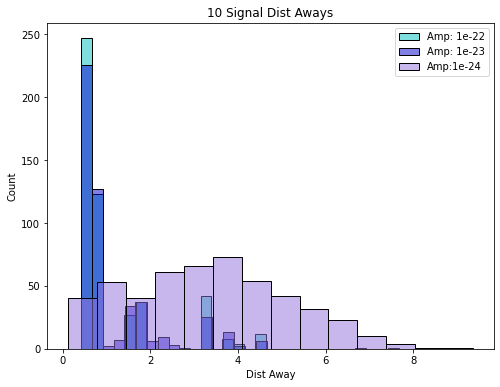

In [44]:
plt.figure(figsize=(8,6),facecolor='w')
sns.histplot(dist_22,alpha=.5,label='Amp: 1e-22',color='c')
sns.histplot(dist_23,alpha=.5,label='Amp: 1e-23',color='mediumblue')
sns.histplot(dist_24,alpha=.5,label='Amp:1e-24',color='mediumpurple')
plt.title('10 Signal Dist Aways')
plt.xlabel("Dist Away")
plt.legend()

# Founds of Other Distances 

In [45]:
dist=['distaway','distaway_1','distaway_2','distaway_3','distaway_4','distaway_5','distaway_6',
     'distaway_7','distaway_8','distaway_9','distaway_10']

In [46]:
#testing on small sample
found=np.zeros(len((df8['distaway'])))

for i in range(len(df8['distaway'])):
    temp=[]
    for n in dist:
        if np.array(df8[n])[i]<=4:
            temp.append(1) 
    found[i]=sum(temp)


In [47]:
found

array([8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 7., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 7., 8., 8., 8., 8., 8., 8., 8., 8., 8., 5., 6.,
       6., 6., 6., 7., 6., 6., 4., 5., 4., 3., 6., 7., 6., 7., 7., 4., 5.,
       5., 6., 5., 5., 5., 6., 6., 5., 4., 3., 5., 6., 5., 7., 6., 6., 5.,
       6., 5., 4., 7., 5., 4., 6., 6., 7., 7., 5., 6., 6., 5.])

In [48]:
def dist_found(df):
    found=np.zeros(len(df['distaway']))
    found2=np.zeros(len(df['distaway']))
    found3=np.zeros(len(df['distaway']))

    for i in range(len(df['distaway'])):
        temp=[]
        for n in dist:
            if np.array(df[n])[i]<=4:
                temp.append(1) 
        found[i]=sum(temp)
    
    for i in range(len(df['distaway'])):
        temp2=[]
        for n in dist:
            if np.array(df[n])[i]<=5:
                temp2.append(1) 
        found2[i]=sum(temp2)
        
    for i in range(len(df['distaway'])):
        temp3=[]
        for n in dist:
            if np.array(df[n])[i]<=6:
                temp3.append(1) 
        found3[i]=sum(temp3)
    
    return found,found2,found3

In [49]:
f1,f2,f3=dist_found(df3)
print(len(f1) )#These are totals (this makes it difficule to divide into amplitudes)
print(f1)
print(f2)
print(f3)

150
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 2. 1. 2. 2. 3. 3. 1. 0. 1. 3. 3. 2. 1. 3. 3. 3. 3. 3. 2. 1.
 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 3. 1. 1. 2. 1. 3. 2. 1. 2. 2. 3. 3. 1. 2.
 2. 1. 1. 1. 3. 2.]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 2. 1. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2.
 3. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 2. 3. 2. 3. 3. 2. 2. 2. 3. 3. 3. 2.
 3. 1. 2. 2. 3. 3.]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 

In [50]:
#now that we see it works letts loop in all of the differnt directories 
found_4=[]
found_5=[]
found_6=[]
for d in DF:
    f1,f2,f3=dist_found(d)
    found_4.append(f1)
    found_5.append(f2)
    found_6.append(f3)

In [51]:
print(len(found_4))
print("Distaway4:",found_4)
print("Distaway5:",found_5)
print("Distaway6:",found_6)

10
Distaway4: [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.]), array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2

In [52]:
#adding these to the df of signals
df1['found_4']= found_4[0];
df1['found_5']=found_5[0];
df1['found_6']=found_6[0];

df2['found_4']= found_4[1];
df2['found_5']=found_5[1];
df2['found_6']=found_6[1];

df3['found_4']= found_4[2];
df3['found_5']=found_5[2];
df3['found_6']=found_6[2];

df4['found_4']= found_4[3];
df4['found_5']=found_5[3];
df4['found_6']=found_6[3];

df5['found_4']= found_4[4];
df5['found_5']=found_5[4];
df5['found_6']=found_6[4];

df6['found_4']= found_4[5];
df6['found_5']=found_5[5];
df6['found_6']=found_6[5];

df7['found_4']= found_4[6];
df7['found_5']=found_5[6];
df7['found_6']=found_6[6];

df8['found_4']= found_4[7];
df8['found_5']=found_5[7];
df8['found_6']=found_6[7];

df9['found_4']=found_4[8];
df9['found_5']=found_5[8];
df9['found_6']=found_6[8];

df10['found_4']=found_4[9];
df10['found_5']=found_5[9];
df10['found_6']=found_6[9];

/var/folders/hb/r0gq0pwd4fs6gj878jn2_cnr0000gw/T/ipykernel_60689/1928948955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['found_4']= found_4[0];
/var/folders/hb/r0gq0pwd4fs6gj878jn2_cnr0000gw/T/ipykernel_60689/1928948955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['found_5']=found_5[0];
/var/folders/hb/r0gq0pwd4fs6gj878jn2_cnr0000gw/T/ipykernel_60689/1928948955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

/var/folders/hb/r0gq0pwd4fs6gj878jn2_cnr0000gw/T/ipykernel_60689/1928948955.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['found_5']=found_5[7];
/var/folders/hb/r0gq0pwd4fs6gj878jn2_cnr0000gw/T/ipykernel_60689/1928948955.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['found_6']=found_6[7];
/var/folders/hb/r0gq0pwd4fs6gj878jn2_cnr0000gw/T/ipykernel_60689/1928948955.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [53]:
df10

,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,distaway_9,f0_6,f0_7,f0_8,f0_9,distaway_10,f0_10,found_4,found_5,found_6
0,10,3,64,9853,1.011750,1.15,4,7,1.000000e-24,5.047423,...,1.366143,5.478202,5.771971,6.133238,6.415242,4.305927,6.671162,5.0,7.0,9.0
1,10,2,64,9853,3.372500,1.15,4,7,1.000000e-24,6.825046,...,3.785218,5.516858,5.834828,6.104615,6.438086,2.937963,6.684307,6.0,7.0,8.0
2,10,3,64,9853,2.023500,1.15,4,7,1.000000e-24,4.637717,...,2.916902,5.523398,5.818878,6.114101,6.370432,4.305927,6.671162,4.0,7.0,9.0
3,10,6,64,9853,2.698000,1.15,4,7,1.000000e-24,3.060224,...,0.410085,5.490977,5.803087,6.104615,6.403931,8.354006,6.594231,7.0,8.0,8.0
4,10,5,64,9853,1.349000,1.15,4,7,1.000000e-24,3.346210,...,1.880204,5.503862,5.803087,6.067201,6.392693,4.305927,6.671162,9.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,10,9,64,9853,1.042409,1.15,4,7,1.000000e-22,1.543205,...,0.410085,5.503862,5.803087,6.104615,6.403931,3.276558,6.697548,10.0,10.0,10.0
46,10,8,64,9853,5.396000,1.15,4,7,1.000000e-22,3.967622,...,0.410085,5.503862,5.803087,6.104615,6.403931,3.276558,6.697548,10.0,10.0,10.0
47,10,9,64,9853,0.827795,1.15,4,7,1.000000e-22,1.543205,...,0.410085,5.503862,5.803087,6.104615,6.403931,3.276558,6.697548,10.0,10.0,10.0
48,10,9,64,9853,0.899333,1.15,4,7,1.000000e-22,0.545490,...,0.410085,5.503862,5.803087,6.104615,6.403931,3.276558,6.697548,10.0,10.0,10.0


In [54]:
#Now to calculate Effieicney for these new found 
#adjusting the above func to 
def Efficiency_Dist4 (df):
    """
    This calcualted the effieiceny of varying amplitudes
    """
    
    N =np.array(df.N)
    Found=np.array(df.found_4)
    H0=np.array(df.h0)
    
    temp=[]
    temp2=[]
    temp3=[]
    
    for i in range(len(N)):
        if H0[i]== 1.0e-22:
            temp.append(Found[i])
        
    #True value of 1e-23/ 1e-24 (this is why they were zero before)
    #currently hardcoded but future annalysis with have user input for these vals
        elif H0[i]==1.0000000000000001e-23:
            temp2.append(Found[i])
        
        elif H0[i]==1.0000000000000001e-24:
            temp3.append(Found[i])
    
    #the 50 is hard coding atm but when simulations vary in size this can be an input (# of sims per amp)
    e1=sum(temp)/(N[1]*50) 
    e2=sum(temp2)/(N[1]*50)
    e3=sum(temp3)/(N[1]*50)
    
    return e1,e2,e3

In [55]:
def Efficiency_Dist5 (df):
    """
    This calcualted the effieiceny of varying amplitudes
    """
    
    N =np.array(df.N)
    Found=np.array(df.found_5)
    H0=np.array(df.h0)
    
    temp=[]
    temp2=[]
    temp3=[]
    
    for i in range(len(N)):
        if H0[i]== 1.0e-22:
            temp.append(Found[i])
        
    #True value of 1e-23/ 1e-24 (this is why they were zero before)
    #currently hardcoded but future annalysis with have user input for these vals
        elif H0[i]==1.0000000000000001e-23:
            temp2.append(Found[i])
        
        elif H0[i]==1.0000000000000001e-24:
            temp3.append(Found[i])
    
    #the 50 is hard coding atm but when simulations vary in size this can be an input (# of sims per amp)
    e1=sum(temp)/(N[1]*50) 
    e2=sum(temp2)/(N[1]*50)
    e3=sum(temp3)/(N[1]*50)
    
    return e1,e2,e3

In [56]:
def Efficiency_Dist6 (df):
    """
    This calcualted the effieiceny of varying amplitudes
    """
    
    N =np.array(df.N)
    Found=np.array(df.found_6)
    H0=np.array(df.h0)
    
    temp=[]
    temp2=[]
    temp3=[]
    
    for i in range(len(N)):
        if H0[i]== 1.0e-22:
            temp.append(Found[i])
        
    #True value of 1e-23/ 1e-24 (this is why they were zero before)
    #currently hardcoded but future annalysis with have user input for these vals
        elif H0[i]==1.0000000000000001e-23:
            temp2.append(Found[i])
        
        elif H0[i]==1.0000000000000001e-24:
            temp3.append(Found[i])
    
    #the 50 is hard coding atm but when simulations vary in size this can be an input (# of sims per amp)
    e1=sum(temp)/(N[1]*50) 
    e2=sum(temp2)/(N[1]*50)
    e3=sum(temp3)/(N[1]*50)
    
    return e1,e2,e3

In [57]:
Efficiency_Dist4(df3) #Testing func

(1.0, 1.0, 0.6666666666666666)

In [58]:
#testing func in a loop
E1_4=[]
E2_4=[]
E3_4=[]
for d in DF:
    e1,e2,e3=Efficiency_Dist4(d)
    E1_4.append(e1)
    E2_4.append(e2)
    E3_4.append(e3)

In [59]:
print(E2_4) #It works!!

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9942857142857143, 0.995, 0.9288888888888889, 0.98]


In [60]:
E1_4=[]
E2_4=[]
E3_4=[]

for d in DF:
    e1,e2,e3=Efficiency_Dist4(d)
    E1_4.append(e1)
    E2_4.append(e2)
    E3_4.append(e3)

E1_5=[]
E2_5=[]
E3_5=[]

for d in DF:
    e1,e2,e3=Efficiency_Dist5(d)
    E1_5.append(e1)
    E2_5.append(e2)
    E3_5.append(e3)


E1_6=[]
E2_6=[]
E3_6=[]

for d in DF:
    e1,e2,e3=Efficiency_Dist6(d)
    E1_6.append(e1)
    E2_6.append(e2)
    E3_6.append(e3)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

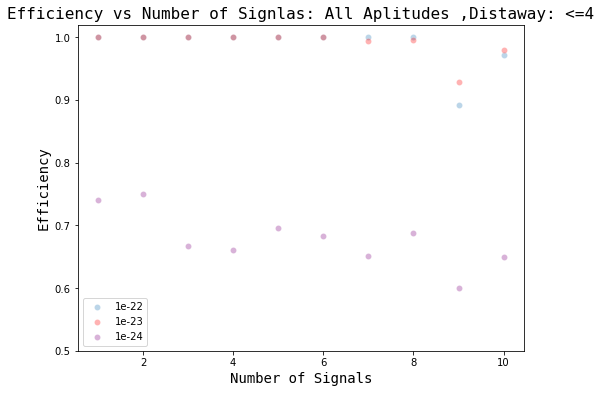

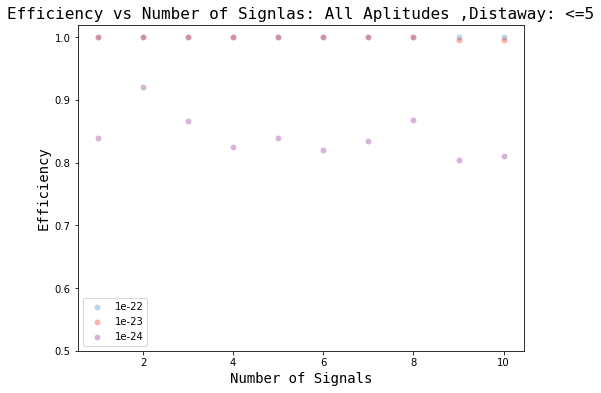

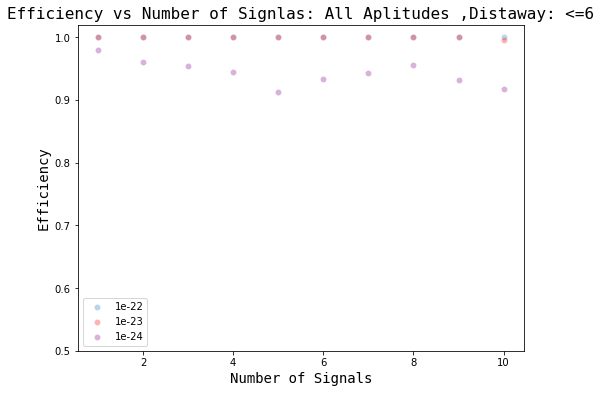

In [61]:
N=np.arange(1,11)

plt.figure(facecolor="w",figsize=[8,6])
sns.scatterplot(N,E1_4,alpha=.3,label='1e-22')
sns.scatterplot(N,E2_4,alpha=.3,color="r",label='1e-23')
sns.scatterplot(N,E3_4,alpha=.3,color="purple",label='1e-24')
plt.title('Efficiency vs Number of Signlas: All Aplitudes ,Distaway: <=4',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.ylim(0.5,1.02)
plt.legend()

plt.figure(facecolor="w",figsize=[8,6])
sns.scatterplot(N,E1_5,alpha=.3,label='1e-22')
sns.scatterplot(N,E2_5,alpha=.3,color="r",label='1e-23')
sns.scatterplot(N,E3_5,alpha=.3,color="purple",label='1e-24')
plt.title('Efficiency vs Number of Signlas: All Aplitudes ,Distaway: <=5',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.ylim(0.5,1.02)
plt.legend()

plt.figure(facecolor="w",figsize=[8,6])
sns.scatterplot(N,E1_6,alpha=.3,label='1e-22')
sns.scatterplot(N,E2_6,alpha=.3,color="r",label='1e-23')
sns.scatterplot(N,E3_6,alpha=.3,color="purple",label='1e-24')
plt.title('Efficiency vs Number of Signlas: All Aplitudes ,Distaway: <=6',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.ylim(0.5,1.02)
plt.legend()

In [62]:
#calculating Std for errorbars 
sig1_dist4=[]
sig2_dist4=[]
sig3_dist4=[]
N=np.arange(1,11)
for i,n in zip(DF,N):
    s1,s2,s3=Std(i,n,E1_4,E2_4,E3_4) 
    sig1_dist4.append(s1) #Amp -22
    sig2_dist4.append(s2) #Amp -23
    sig3_dist4.append(s3) #Amp -24
    
sig1_dist5=[]
sig2_dist5=[]
sig3_dist5=[]
N=np.arange(1,11)
for i,n in zip(DF,N):
    s1,s2,s3=Std(i,n,E1_5,E2_5,E3_5) 
    sig1_dist5.append(s1) #Amp -22
    sig2_dist5.append(s2) #Amp -23
    sig3_dist5.append(s3) #Amp -24
    
sig1_dist6=[]
sig2_dist6=[]
sig3_dist6=[]
N=np.arange(1,11)
for i,n in zip(DF,N):
    s1,s2,s3=Std(i,n,E1_6,E2_6,E3_6) 
    sig1_dist6.append(s1) #Amp -22
    sig2_dist6.append(s2) #Amp -23
    sig3_dist6.append(s3) #Amp -24

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


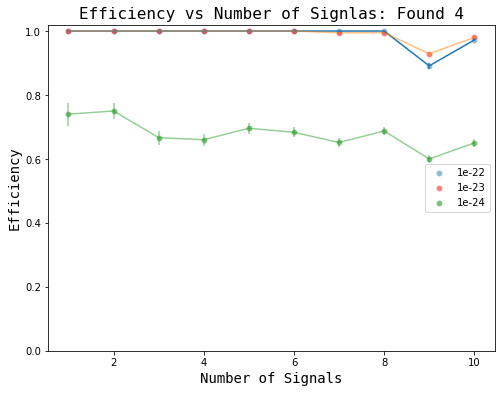

In [63]:
plt.figure(facecolor="w",figsize=[8,6])
sns.scatterplot(N,E1_4,alpha=.5,label='1e-22')
sns.scatterplot(N,E2_4,alpha=.5,color='red',label='1e-23')
sns.scatterplot(N,E3_4,alpha=.5,color='green',label='1e-24')
plt.title('Efficiency vs Number of Signlas: Found 4',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.errorbar(N,E1_4,yerr=sig1_dist4)
plt.errorbar(N,E2_4,yerr=sig2_dist4,alpha=.5)
plt.errorbar(N,E3_4,yerr=sig3_dist4,alpha=.5)
plt.ylim(0.0,1.02)
plt.legend(loc='center right')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


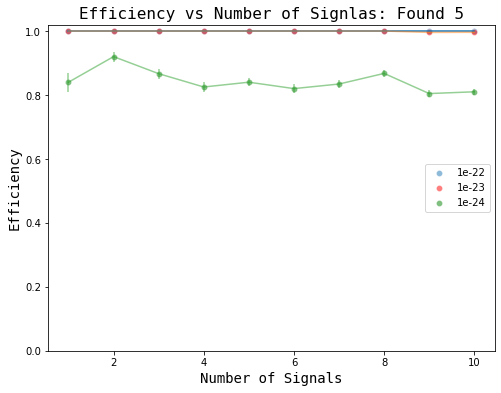

In [64]:
plt.figure(facecolor="w",figsize=[8,6])
sns.scatterplot(N,E1_5,alpha=.5,label='1e-22')
sns.scatterplot(N,E2_5,alpha=.5,color='red',label='1e-23')
sns.scatterplot(N,E3_5,alpha=.5,color='green',label='1e-24')
plt.title('Efficiency vs Number of Signlas: Found 5',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.errorbar(N,E1_5,yerr=sig1_dist5)
plt.errorbar(N,E2_5,yerr=sig2_dist5,alpha=.5)
plt.errorbar(N,E3_5,yerr=sig3_dist5,alpha=.5)
plt.ylim(0.0,1.02)
plt.legend(loc='center right')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


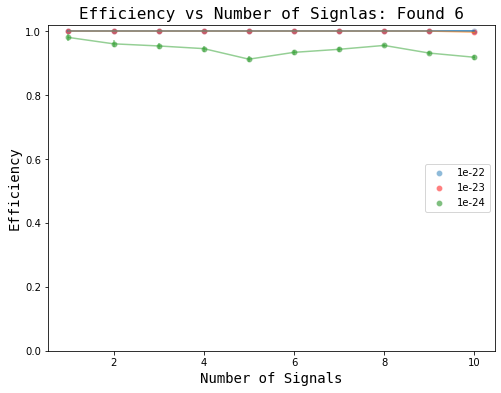

In [65]:
plt.figure(facecolor="w",figsize=[8,6])
sns.scatterplot(N,E1_6,alpha=.5,label='1e-22')
sns.scatterplot(N,E2_6,alpha=.5,color='red',label='1e-23')
sns.scatterplot(N,E3_6,alpha=.5,color='green',label='1e-24')
plt.title('Efficiency vs Number of Signlas: Found 6',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.errorbar(N,E1_6,yerr=sig1_dist6)
plt.errorbar(N,E2_6,yerr=sig2_dist6,alpha=.5)
plt.errorbar(N,E3_6,yerr=sig3_dist6,alpha=.5)
plt.ylim(0.0,1.02)
plt.legend(loc='center right')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<ErrorbarContainer object of 3 artists>

<Figure size 432x288 with 0 Axes>

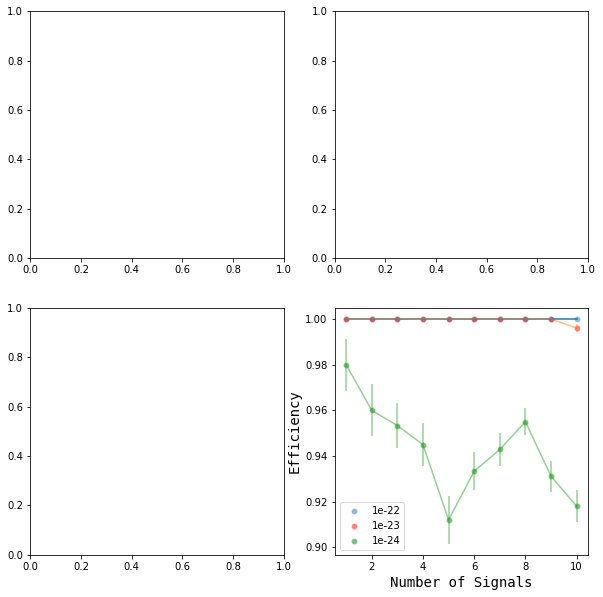

In [66]:
plt.figure(facecolor='w')
fig, axs = plt.subplots(2, 2, figsize=(10, 10),facecolor='w')

sns.scatterplot(N,E1_6,alpha=.5,label='1e-22',ax=())
sns.scatterplot(N,E2_6,alpha=.5,color='red',label='1e-23')
sns.scatterplot(N,E3_6,alpha=.5,color='green',label='1e-24')
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.errorbar(N,E1_6,yerr=sig1_dist6)
plt.errorbar(N,E2_6,yerr=sig2_dist6,alpha=.5)
plt.errorbar(N,E3_6,yerr=sig3_dist6,alpha=.5)

# Dist Away and Cr Graph

In [209]:
dist

['distaway',
 'distaway_1',
 'distaway_2',
 'distaway_3',
 'distaway_4',
 'distaway_5',
 'distaway_6',
 'distaway_7',
 'distaway_8',
 'distaway_9',
 'distaway_10']

In [177]:
def dist_cr_found(df,distaway,c):
    found=np.zeros(len(df['distaway']))
    
    for i in range(len(df['distaway'])):
        temp=[]
        for n in dist:
            if np.array(df[n])[i]<=distaway and np.array(df['Cr'])[i]>=c:
                temp.append(1) 
        found[i]=sum(temp) 
    
    return found

In [169]:
for d in DF:  
    found=dist_cr_found(d,6,5)
    d['dist6_cr5']=found

/var/folders/hb/r0gq0pwd4fs6gj878jn2_cnr0000gw/T/ipykernel_60689/3833778407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['dist6_cr5']=found


In [189]:
found=dist_cr_found(df2,6,5)
d['dist6_cr5']=found

/var/folders/hb/r0gq0pwd4fs6gj878jn2_cnr0000gw/T/ipykernel_60689/1287829189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['dist6_cr5']=found


In [201]:
df2['h0'][1]

1    1.000000e-23
1    1.000000e-22
1    1.000000e-24
Name: h0, dtype: float64

In [205]:
#Calculating efficiency for new 12 cols
def Efficiencys(df,col):
    """
    This calcualted the effieiceny of varying amplitudes
    """
    
    N =np.array(df.N)
    Found=np.array(df[col])
    H0=np.array(df.h0)
    
    temp=[]
    temp2=[]
    temp3=[]
    
    for i in range(len(N)):
        if H0[i]== 1.0e-22:
            temp.append(Found[i])
        
    #True value of 1e-23/ 1e-24 (this is why they were zero before)
    #currently hardcoded but future annalysis with have user input for these vals
        if H0[i]==1.0000000000000001e-23:
            temp2.append(Found[i])
        
        if H0[i]==1.0000000000000001e-24:
            temp3.append(Found[i])
    
    #the 50 is hard coding atm but when simulations vary in size this can be an input (# of sims per amp)
    e1=sum(temp)/(N[1]*50) 
    e2=sum(temp2)/(N[1]*50)
    e3=sum(temp3)/(N[1]*50)
    
    return e1,e2,e3


In [206]:
cols=['dist3_cr3','dist3_cr4','dist3_cr5','dist4_cr3','dist4_cr4','dist4_cr5','dist5_cr3',
      'dist5_cr4','dist5_cr5','dist6_cr3','dist6_cr4','dist6_cr5']

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

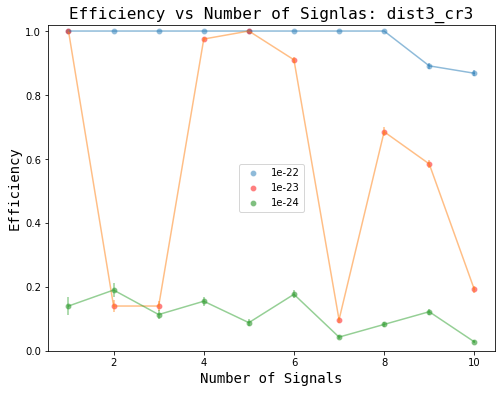

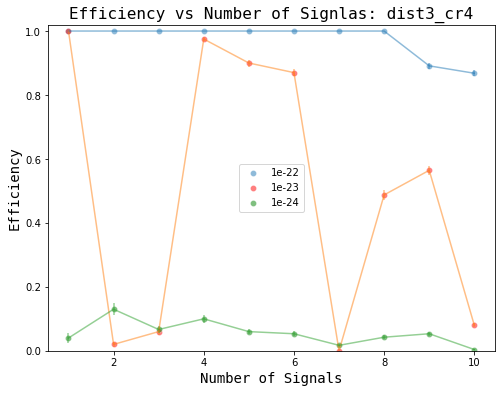

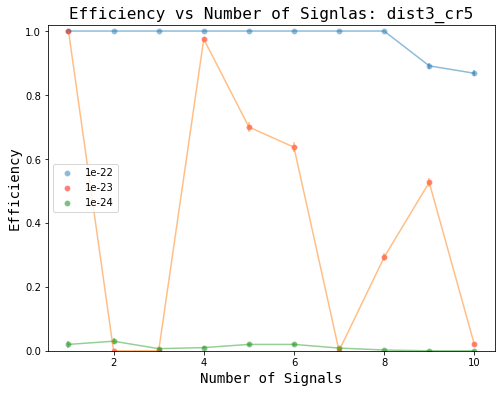

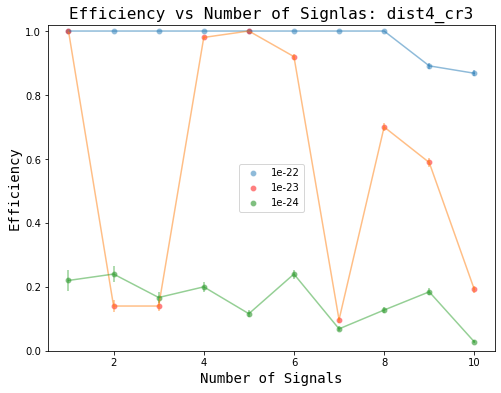

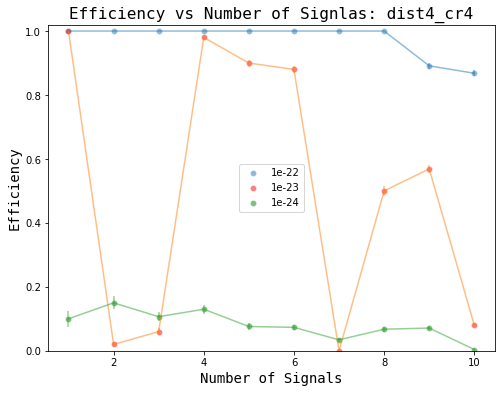

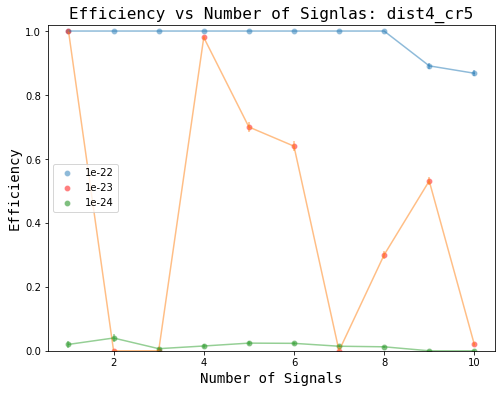

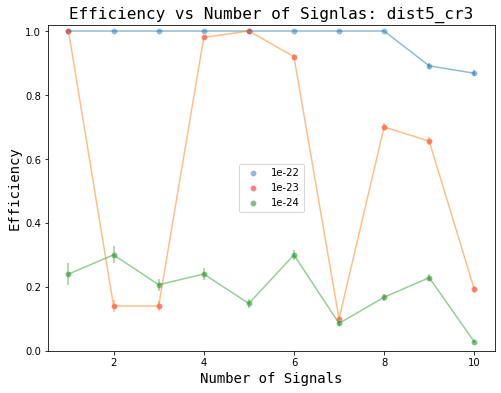

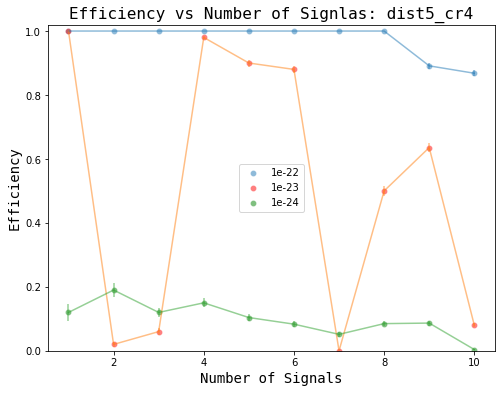

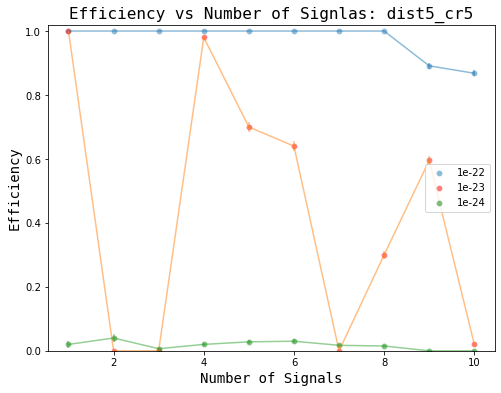

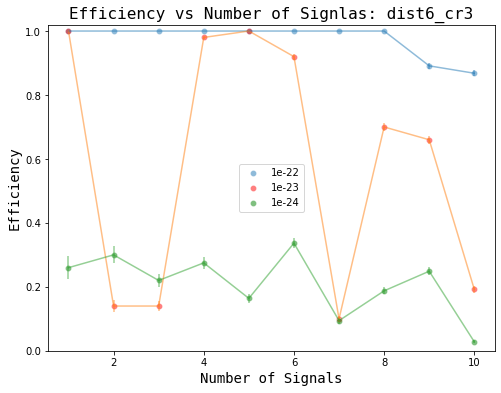

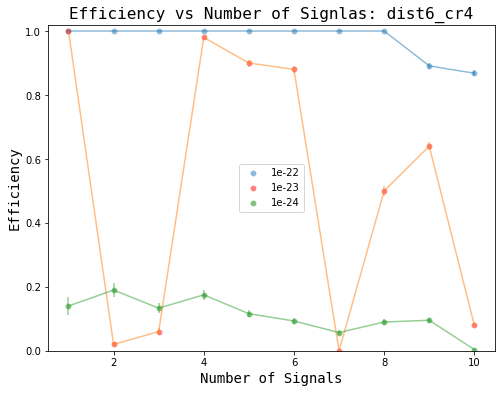

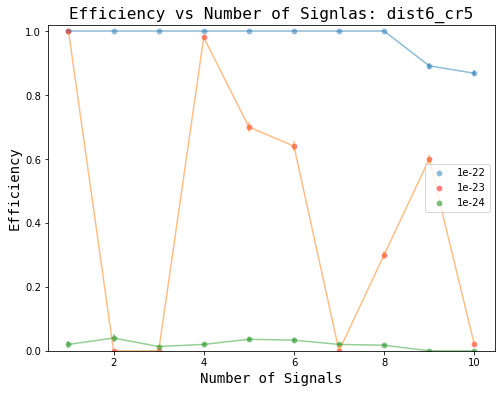

In [207]:
   for c in cols:
        E=[]
        E2=[]
        E3=[]
        for d in DF:
            e1,e2,e3=Efficiencys(d,c)
            E.append(e1)
            E2.append(e2)
            E3.append(e3)
        
        
        sig1=[]
        sig2=[]
        sig3=[]
        N=np.arange(1,11)
        for i,n in zip(DF,N):
            s1,s2,s3=Std(i,n,E1,E2,E3) 
            sig1.append(s1) #Amp -22
            sig2.append(s2) #Amp -23
            sig3.append(s3) #Amp -24
        
        plt.figure(facecolor="w",figsize=[8,6])
        sns.scatterplot(N,E1,alpha=.5,label='1e-22')
        sns.scatterplot(N,E2,alpha=.5,color='red',label='1e-23')
        sns.scatterplot(N,E3,alpha=.5,color='green',label='1e-24')
        
        title='Efficiency vs Number of Signlas: ' + str(c) 
        
        plt.title(title,font='monospace',fontsize=16)
        plt.xlabel("Number of Signals",font='monospace',fontsize=14)
        plt.ylabel("Efficiency",font='monospace',fontsize=14)
        plt.ylim(0.0,1.02)
        plt.errorbar(N,E1,yerr=sig1,alpha=.5)
        plt.errorbar(N,E2,yerr=sig2,alpha=.5)
        plt.errorbar(N,E3,yerr=sig3,alpha=.5)
        plt.legend(loc='best')

In [217]:
for i in range (50):
    temp=[]
    for d in dist: 
        if np.array(df2[d])[i]<=3 and np.array(df2['Cr'])[i]>=:
           temp.append(1)
    new_found=sum(temp)
    df2['dist3_cr5'][i]=new_found

/var/folders/hb/r0gq0pwd4fs6gj878jn2_cnr0000gw/T/ipykernel_60689/2209327199.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['dist3_cr5'][i]=new_found


In [216]:
df2['dist3_cr4']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
45    0.0
46    2.0
47    0.0
48    0.0
49    0.0
Name: dist3_cr4, Length: 150, dtype: float64

# Parameters Analysis 

In [199]:
path="/Users/lianysfeliciano/Nikhef_REU/GFH_Sims"

files=glob.glob(path+'/*.csv') 

ls=[]

for f in files: #loop to open each df
    temp_df=pd.read_csv(f) 
    ls.append(temp_df) #adding files to list 

df=pd.concat(ls,axis=0)  #merging them into one dataframe 
print("Shape:",df.shape) #(NAN values will be inplace instead of 0 distances )
df.head()

Shape: (1500, 31)


,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,distaway_6,distaway_7,distaway_8,distaway_9,f0_6,f0_7,f0_8,f0_9,distaway_10,f0_10
0,4,2,64,9853,8.768500,1.15,4,7,1.000000e-24,3.520856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1,64,9853,2.023500,1.15,4,7,1.000000e-24,5.690079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,2,64,9853,2.698000,1.15,4,7,1.000000e-24,0.648514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3,64,9853,2.023500,1.15,4,7,1.000000e-24,6.011481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,64,9853,1.180375,1.15,4,7,1.000000e-24,4.400973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
path="/Users/lianysfeliciano/Nikhef_REU/GFH_Sims"

files=glob.glob(path+'/*.csv') 

ls=[]

for f in files: #loop to open each df
    temp_df=pd.read_csv(f) 
    ls.append(temp_df) #adding files to list 

df=pd.concat(ls,axis=0)  #merging them into one dataframe 
print("Shape:",df.shape) #(NAN values will be inplace instead of 0 distances )
df.head()

Shape: (1500, 31)


,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,distaway_6,distaway_7,distaway_8,distaway_9,f0_6,f0_7,f0_8,f0_9,distaway_10,f0_10
0,4,2,64,9853,8.768500,1.15,4,7,1.000000e-24,3.520856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1,64,9853,2.023500,1.15,4,7,1.000000e-24,5.690079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,2,64,9853,2.698000,1.15,4,7,1.000000e-24,0.648514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3,64,9853,2.023500,1.15,4,7,1.000000e-24,6.011481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,64,9853,1.180375,1.15,4,7,1.000000e-24,4.400973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Parameters Graph

In [74]:
path="/Users/lianysfeliciano/Nikhef_REU/Parameters"

files=glob.glob(path+'/*.csv') 

ls=[]

for f in files: #loop to open each df
    temp_df=pd.read_csv(f) 
    ls.append(temp_df) #adding files to list 

Df=pd.concat(ls,axis=0)  #merging them into one dataframe 
print("Shape:",df.shape) #(NAN values will be inplace instead of 0 distances )
Df.head()

Shape: (1500, 31)


,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,Cm_6,Cm_7,Cm_8,Cm_9,distaway_10,f0_10,mc_found_10,injKn_10,injF0_10,Cm_10
0,4,1,64,9853,2.698000,1.15,4,7,1.000000e-24,2.871855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4,4,64,9853,34.230875,1.15,4,7,1.000000e-23,0.648514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4,4,64,9853,17.729714,1.15,4,7,1.000000e-22,0.648514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5,5,64,9853,2.023500,1.15,4,7,1.000000e-24,0.129621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,1,64,9853,39.964125,1.15,4,7,1.000000e-23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df22=Df[Df['h0']==1e-22]
df22

,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,Cm_6,Cm_7,Cm_8,Cm_9,distaway_10,f0_10,mc_found_10,injKn_10,injF0_10,Cm_10
0,4,4,64,9853,17.729714,1.15,4,7,1.000000e-22,0.648514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,1,64,9853,12.365833,1.15,4,7,1.000000e-22,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5,5,64,9853,5.470944,1.15,4,7,1.000000e-22,2.007371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,2,64,9853,3.088500,1.15,4,7,1.000000e-22,1.772710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,9,8,64,9853,10.117500,1.15,4,7,1.000000e-22,4.569158,...,-0.166233339548554+0.51161361245825i,-0.146590641555863+0.451159604220438i,-0.130151097506142+0.400563890139945i,-0.116262529159663+0.357819271985053i,NaN,NaN,NaN,NaN,NaN,NaN
0,6,6,64,9853,7.056308,1.15,4,7,1.000000e-22,0.308512,...,-0.122921998287416+0.378315010485865i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10,9,64,9853,0.791804,1.15,4,7,1.000000e-22,1.543205,...,-0.177517461762178+0.546342569626591i,-0.157941919052417+0.486095244097492i,-0.141355710993527+0.435048144610481i,-0.127187096649018+0.391441633497802i,3.276558,6.697548,0.378256,-1.103888e-07,6.7,-0.114993801286401+0.353914529096359i
0,3,3,64,9853,2.155110,1.15,4,7,1.000000e-22,1.552082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,8,8,64,9853,3.021760,1.15,4,7,1.000000e-22,1.877746,...,-0.153540050923099+0.472547687023073i,-0.133999432233708+0.412407846576514i,-0.11787726605711+0.362788921151193i,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,7,7,64,9853,2.105258,1.15,4,7,1.000000e-22,2.425659,...,-0.139195143204895+0.428398600696456i,-0.120001715531059+0.369327304322728i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df23=Df[Df['h0']==1.0000000000000001e-23]
df23

,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,Cm_6,Cm_7,Cm_8,Cm_9,distaway_10,f0_10,mc_found_10,injKn_10,injF0_10,Cm_10
0,4,4,64,9853,34.230875,1.15,4,7,1.000000e-23,0.648514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,1,64,9853,39.964125,1.15,4,7,1.000000e-23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5,4,64,9853,6.552286,1.15,4,7,1.000000e-23,2.007371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,2,64,9853,2.544705,1.15,4,7,1.000000e-23,1.772710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,9,8,64,9853,6.913625,1.15,4,7,1.000000e-23,4.569158,...,-0.166233339548554+0.51161361245825i,-0.146590641555863+0.451159604220438i,-0.130151097506142+0.400563890139945i,-0.116262529159663+0.357819271985053i,NaN,NaN,NaN,NaN,NaN,NaN
0,10,9,64,9853,0.915393,1.15,4,7,1.000000e-23,1.543205,...,-0.177517461762178+0.546342569626591i,-0.157941919052417+0.486095244097492i,-0.141355710993527+0.435048144610481i,-0.127187096649018+0.391441633497802i,3.276558,6.697548,0.378256,-1.103888e-07,6.7,-0.114993801286401+0.353914529096359i
0,6,6,64,9853,4.384250,1.15,4,7,1.000000e-23,0.308512,...,-0.122921998287416+0.378315010485865i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3,3,64,9853,2.289212,1.15,4,7,1.000000e-23,1.552082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,8,8,64,9853,2.946500,1.15,4,7,1.000000e-23,0.836034,...,-0.153540050923099+0.472547687023073i,-0.133999432233708+0.412407846576514i,-0.11787726605711+0.362788921151193i,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,7,7,64,9853,1.725926,1.15,4,7,1.000000e-23,2.425659,...,-0.139195143204895+0.428398600696456i,-0.120001715531059+0.369327304322728i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df24=Df[Df['h0']==1.0000000000000001e-24]
df24.head()

,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,Cm_6,Cm_7,Cm_8,Cm_9,distaway_10,f0_10,mc_found_10,injKn_10,injF0_10,Cm_10
0,4,1,64,9853,2.6980,1.15,4,7,1.000000e-24,2.871855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5,5,64,9853,2.0235,1.15,4,7,1.000000e-24,0.129621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,0,64,9853,1.3490,1.15,4,7,1.000000e-24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,6,4,64,9853,2.6980,1.15,4,7,1.000000e-24,0.308512,...,-0.122921998287416+0.378315010485865i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10,5,64,9853,2.6980,1.15,4,7,1.000000e-24,0.545490,...,-0.177517461762178+0.546342569626591i,-0.157941919052417+0.486095244097492i,-0.141355710993527+0.435048144610481i,-0.127187096649018+0.391441633497802i,3.276558,6.697548,0.378256,-1.103888e-07,6.7,-0.114993801286401+0.353914529096359i


In [78]:
df22['Cm_8']

0                                      NaN
0                                      NaN
0                                      NaN
0                                      NaN
0    -0.130151097506142+0.400563890139945i
0                                      NaN
0    -0.141355710993527+0.435048144610481i
0                                      NaN
0     -0.11787726605711+0.362788921151193i
0                                      NaN
Name: Cm_8, dtype: object

In [79]:
#Makinng arrays for frquenncies
f0_22= np.array([df22['f0'],df22['f0_1'],df22['f0_2'],df22['f0_3'],df22['f0_4'],df22['f0_5'],
        df22['f0_6'],df22['f0_7'],df22['f0_8'],df22['f0_9'],df22['f0_10']])
f0_22=f0_22.flatten()

f0_23= np.array([df23['f0'],df23['f0_1'],df23['f0_2'],df23['f0_3'],df23['f0_4'],df23['f0_5'],
        df23['f0_6'],df23['f0_7'],df23['f0_8'],df23['f0_9'],df23['f0_10']])
f0_23=f0_23.flatten()

f0_24= np.array([df24['f0'],df24['f0_1'],df24['f0_2'],df24['f0_3'],df24['f0_4'],df24['f0_5'],
        df24['f0_6'],df24['f0_7'],df24['f0_8'],df24['f0_9'],df24['f0_10']])
f0_24=f0_24.flatten()

In [80]:
cm_22=np.array([df22['mc_found'],df22['mc_found_1'],df22['mc_found_2'],df22['mc_found_3'],df22['mc_found_4'],
               df22['mc_found_5'],df22['mc_found_6'],df22['mc_found_7'],df22['mc_found_8'],df22['mc_found_9'],
                df22['mc_found_10']])
cm_22=cm_22.flatten()

cm_23=np.array([df23['mc_found'],df23['mc_found_1'],df23['mc_found_2'],df23['mc_found_3'],df23['mc_found_4'],
               df23['mc_found_5'],df23['mc_found_6'],df23['mc_found_7'],df23['mc_found_8'],df23['mc_found_9'],
                df23['mc_found_10']])
cm_23=cm_23.flatten()

cm_24=np.array([df24['mc_found'],df24['mc_found_1'],df24['mc_found_2'],df24['mc_found_3'],df24['mc_found_4'],
                df24['mc_found_5'],df24['mc_found_6'],df24['mc_found_7'],df24['mc_found_8'],df24['mc_found_9'],
               df24['mc_found_10']])
cm_24=cm_24.flatten()

In [81]:
dist_22=np.array([df22['distaway'],df22['distaway_1'],df22['distaway_2'],df22['distaway_3'],df22['distaway_4'],
                  df22['distaway_5'],df22['distaway_6'],df22['distaway_7'],df22['distaway_8'],df22['distaway_9'],
                 df22['distaway_10']])
dist_22=dist_22.flatten()

dist_23=np.array([df23['distaway'],df23['distaway_1'],df23['distaway_2'],df23['distaway_3'],df23['distaway_4']
                 ,df23['distaway_5'],df23['distaway_6'],df23['distaway_7'],df23['distaway_8'],df23['distaway_9'],
                 df23['distaway_10']])
dist_23=dist_23.flatten()

dist_24=np.array([df24['distaway'],df24['distaway_1'],df24['distaway_2'],df24['distaway_3'],df24['distaway_4'],
                 df24['distaway_5'],df24['distaway_6'],df24['distaway_7'],df24['distaway_8'],df24['distaway_9'],
                  df24['distaway_10']])
dist_24=dist_24.flatten()

In [82]:
injf0_22= np.array([df22['injF0'],df22['injF0_1'],df22['injF0_2'],df22['injF0_3'],df22['injF0_4'],df22['injF0_5'],
        df22['injF0_6'],df22['injF0_7'],df22['injF0_8'],df22['injF0_9'],df22['injF0_10']])
injf0_22=injf0_22.flatten()

injf0_23= np.array([df23['injF0'],df23['injF0_1'],df23['injF0_2'],df23['injF0_3'],df23['injF0_4'],df23['injF0_5'],
        df23['injF0_6'],df23['injF0_7'],df23['injF0_8'],df23['injF0_9'],df23['injF0_10']])
injf0_23=injf0_23.flatten()

injf0_24= np.array([df24['injF0'],df24['injF0_1'],df24['injF0_2'],df24['injF0_3'],df24['injF0_4'],df22['injF0_5'],
        df24['injF0_6'],df24['injF0_7'],df24['injF0_8'],df24['injF0_9'],df24['injF0_10']])
injf0_24=injf0_24.flatten()

In [83]:
injkn_22= np.array([df22['injKn'],df22['injKn_1'],df22['injKn_2'],df22['injKn_3'],df22['injKn_4'],df22['injKn_5'],
        df22['injKn_6'],df22['injKn_7'],df22['injKn_8'],df22['injKn_9'],df22['injKn_10']])
injkn_22=injkn_22.flatten()

injkn_23= np.array([df23['injKn'],df23['injKn_1'],df23['injKn_2'],df23['injKn_3'],df23['injKn_4'],df23['injKn_5'],
        df23['injKn_6'],df23['injKn_7'],df23['injKn_8'],df23['injKn_9'],df23['injKn_10']])
injkn_23=injkn_23.flatten()

injkn_24= np.array([df24['injKn'],df24['injKn_1'],df24['injKn_2'],df24['injKn_3'],df24['injKn_4'],df22['injKn_5'],
        df24['injKn_6'],df24['injKn_7'],df24['injKn_8'],df24['injKn_9'],df24['injKn_10']])
injkn_24=injkn_24.flatten()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


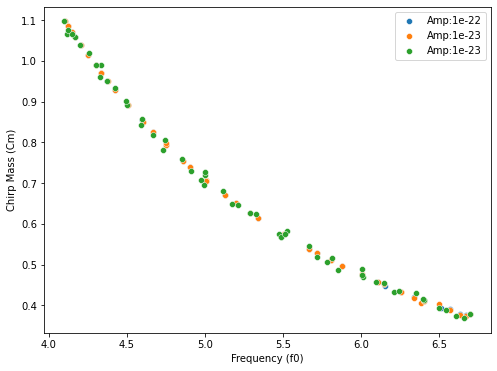

In [84]:
plt.figure(facecolor='w',figsize=(8,6))
sns.scatterplot(f0_22,cm_22,label="Amp:1e-22")
sns.scatterplot(f0_23,cm_23,label='Amp:1e-23')
sns.scatterplot(f0_24,cm_24,label='Amp:1e-23')
plt.xlabel('Frequency (f0)')
plt.ylabel("Chirp Mass (Cm)")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


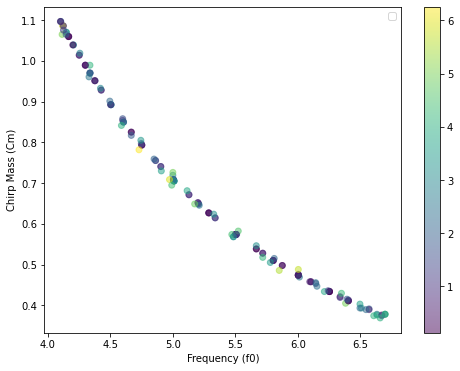

In [85]:
#Colored by distaway
plt.figure(facecolor='w',figsize=(8,6))
plt.scatter(f0_22,cm_22,c=dist_22,alpha=.5)
plt.scatter(f0_23,cm_23,c=dist_23,alpha=.5)
plt.scatter(f0_24,cm_24,c=dist_24,alpha=.5)
plt.xlabel('Frequency (f0)')
plt.ylabel("Chirp Mass (Cm)")
plt.legend()
plt.colorbar()

In [86]:
def Cm_from_K(K):
    c=299792458;
    msun=1.99e30;
    G=6.626e-11;
    pi=np.pi
    
    M=(c**3/G)* (-K/(pi**(8/3))*(5/96))**(3/5)
    M=M/msun
    return(M)

In [87]:
injcm_22=Cm_from_K(injkn_22)
injcm_23=Cm_from_K(injkn_23)
injcm_24=Cm_from_K(injkn_24)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


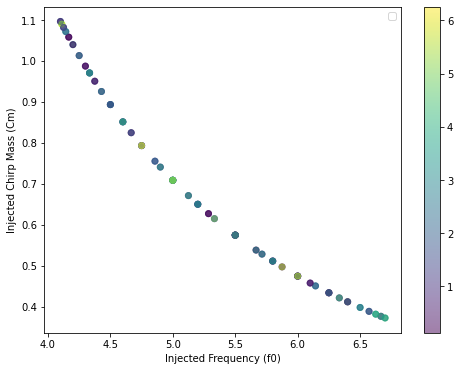

In [88]:
plt.figure(facecolor='w',figsize=(8,6))
plt.scatter(injf0_22,injcm_22,c=dist_22,alpha=.5)
plt.scatter(injf0_23,injcm_23,c=dist_23,alpha=.5)
plt.scatter(injf0_24,injcm_24,c=dist_24,alpha=.5)
plt.xlabel('Injected Frequency (f0)')
plt.ylabel("Injected Chirp Mass (Cm)")
plt.legend()
plt.colorbar()

## Computing Durration to Color Graph By Durration

In [103]:
def time_coalescence(f,f0,CM):
    G=6.67430e-11
    c=299792458
    Msun=1.989e30
    pi=np.pi
    
    t1=-(5/250)*((pi*f0)**(-8/3))* ((G*CM*Msun)/(c**3))**(-5/3)
    t2=-(5/250)*((pi*f)**(-8/3))* ((G*CM*Msun)/(c**3))**(-5/3)
    
    time=t2-t1
    return time

In [104]:
time_coalescence(4.54,7,1.15) #it works

-6357.204211565988

In [105]:
#Running func on a loop
durr_22=[]
for i in range (len(f0_22)):
    t=time_coalescence(7,f0_22[i],cm_22[i])
    durr_22.append(t)

In [106]:
durr_23=[]
for i in range (len(f0_23)):
    t=time_coalescence(7,f0_23[i],cm_23[i])
    durr_23.append(t)


In [107]:
durr_24=[]
for i in range (len(f0_24)):
    t=time_coalescence(7,f0_24[i],cm_24[i])
    durr_24.append(t)


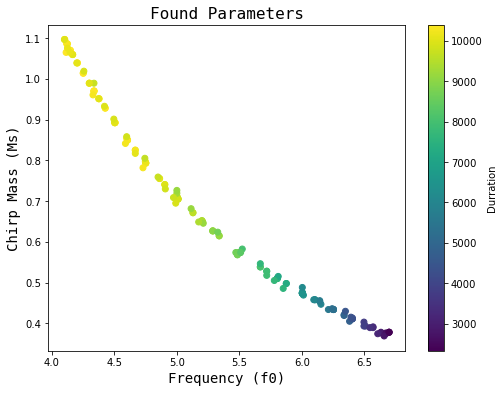

In [109]:
plt.figure(facecolor='w',figsize=(8,6))
plt.scatter(f0_22,cm_22,c=durr_22)#cmap='PiYG'
plt.scatter(f0_23,cm_23,c=durr_23)#cmap='PiYG'
plt.scatter(f0_24,cm_24,c=durr_24)#cmap='PiYG'
plt.xlabel('Frequency (f0)',font='monospace',fontsize=14)
plt.ylabel("Chirp Mass (Ms)",font='monospace',fontsize=14)
plt.title("Found Parameters",font='monospace',fontsize=16)
plt.colorbar(label="Durration")

In [95]:
injdurr_22=[]
for i in range (len(injf0_22)):
    t=time_coalescence(7,injf0_22[i],injcm_22[i])
    injdurr_22.append(t)

In [96]:
injdurr_23=[]
for i in range (len(injf0_23)):
    t=time_coalescence(7,injf0_23[i],injcm_23[i])
    injdurr_23.append(t)

In [97]:
injdurr_24=[]
for i in range (len(injf0_24)):
    t=time_coalescence(7,injf0_24[i],injcm_24[i])
    durr_24.append(t)

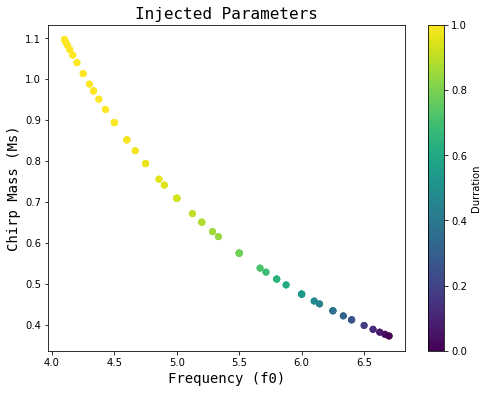

In [110]:
plt.figure(facecolor='w',figsize=(8,6))
plt.scatter(injf0_22,injcm_22,c=injdurr_22)#cmap='PiYG'
plt.scatter(injf0_23,injcm_23,c=injdurr_23)#cmap='PiYG'
plt.scatter(injf0_24,injcm_24,c=injdurr_24)#cmap='PiYG'
plt.xlabel('Frequency (f0)',font='monospace',fontsize=14)
plt.ylabel("Chirp Mass (Ms)",font='monospace',fontsize=14)
plt.title("Injected Parameters",font='monospace',fontsize=16)
plt.colorbar(label="Durration")